<font color='black' size=3>Виктория Карпейкина, Юлия Щучкина, Максим Бочаров</font>

<font color='magenta' size=5>Тема проекта: "Классификация криптовалют на основе их рыночных показателей"</font>




<font color='purple' size=10>****EDA и Визуализация****</font>

In [100]:
import numpy as np
import pandas as pd
import scipy.stats as sts

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('Paired')

import plotly.express as px
import datetime

import plotly.io as pio
pio.renderers.default = 'notebook'

<font color='red' size=6>****Предварительная обработка****</font>

In [101]:
# Распечатали табличку с котировками
df = pd.read_csv('df_price.csv')
df.head()

Unnamed: 0  BTCUSDT  ETHUSDT  BNBUSDT  NEOUSDT  LTCUSDT  QTUMUSDT  ADAUSDT  \
0           0  7200.85   130.77  13.7184    8.850    41.62     1.603  0.03348   
1           1  6965.71   127.19  13.0105    8.462    39.43     1.533  0.03269   
2           2  7344.96   134.35  13.6474    8.888    42.23     1.629  0.03417   
3           3  7354.11   134.20  13.8092    9.077    42.78     1.642  0.03434   
4           4  7358.75   135.37  14.0532    9.020    43.30     1.631  0.03460   

   XRPUSDT  EOSUSDT  ...  NKNUSDT  STXUSDT  KAVAUSDT  ARPAUSDT  IOTXUSDT  \
0  0.19305   2.6039  ...  0.01809   0.0989    1.1364   0.01064  0.003457   
1  0.18750   2.4593  ...  0.01845   0.0897    1.0172   0.00985  0.003358   
2  0.19338   2.6396  ...  0.01820   0.0945    1.0241   0.01007  0.003410   
3  0.19305   2.6481  ...  0.01785   0.0944    1.0401   0.01022  0.003543   
4  0.19453   2.6865  ...  0.01868   0.0920    1.0310   0.01008  0.003565   

   RLCUSDT  CTXCUSDT  BCHUSDT  TROYUSDT  VITEUSDT  
0   0.4177    0.0640   204.44  0.006779   0.01104  
1   0.3764    0.0614   195.49  0.006475   0.01042  
2   0.4041    0.0633   222.43  0.006432   0.01123  
3   0.3981    0.0698   224.47  0.006401   0.01170  
4   0.4050    0.0668   222.79  0.006568   0.01109  

[5 rows x 69 columns]

In [102]:
df.shape

(1226, 69)

 По столбцам: валютные пары типа «криптовалюта/USDT». По строкам: их ежедневные цены начиная с 1.01.2020 и до 10.05.2023. 

In [103]:
df.rename(columns={'Unnamed: 0':'Date'}, inplace=True)
df.head()

Date  BTCUSDT  ETHUSDT  BNBUSDT  NEOUSDT  LTCUSDT  QTUMUSDT  ADAUSDT  \
0     0  7200.85   130.77  13.7184    8.850    41.62     1.603  0.03348   
1     1  6965.71   127.19  13.0105    8.462    39.43     1.533  0.03269   
2     2  7344.96   134.35  13.6474    8.888    42.23     1.629  0.03417   
3     3  7354.11   134.20  13.8092    9.077    42.78     1.642  0.03434   
4     4  7358.75   135.37  14.0532    9.020    43.30     1.631  0.03460   

   XRPUSDT  EOSUSDT  ...  NKNUSDT  STXUSDT  KAVAUSDT  ARPAUSDT  IOTXUSDT  \
0  0.19305   2.6039  ...  0.01809   0.0989    1.1364   0.01064  0.003457   
1  0.18750   2.4593  ...  0.01845   0.0897    1.0172   0.00985  0.003358   
2  0.19338   2.6396  ...  0.01820   0.0945    1.0241   0.01007  0.003410   
3  0.19305   2.6481  ...  0.01785   0.0944    1.0401   0.01022  0.003543   
4  0.19453   2.6865  ...  0.01868   0.0920    1.0310   0.01008  0.003565   

   RLCUSDT  CTXCUSDT  BCHUSDT  TROYUSDT  VITEUSDT  
0   0.4177    0.0640   204.44  0.006779   0.01104  
1   0.3764    0.0614   195.49  0.006475   0.01042  
2   0.4041    0.0633   222.43  0.006432   0.01123  
3   0.3981    0.0698   224.47  0.006401   0.01170  
4   0.4050    0.0668   222.79  0.006568   0.01109  

[5 rows x 69 columns]

Запишем дату каждого наблюдения в таблицу

In [104]:
pd.date_range(start='1/1/2020', periods=1226)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2023-05-01', '2023-05-02', '2023-05-03', '2023-05-04',
               '2023-05-05', '2023-05-06', '2023-05-07', '2023-05-08',
               '2023-05-09', '2023-05-10'],
              dtype='datetime64[ns]', length=1226, freq='D')

In [105]:
df['Date'] = pd.date_range(start='1/1/2020', periods=1226)
df.head()

Date  BTCUSDT  ETHUSDT  BNBUSDT  NEOUSDT  LTCUSDT  QTUMUSDT  ADAUSDT  \
0 2020-01-01  7200.85   130.77  13.7184    8.850    41.62     1.603  0.03348   
1 2020-01-02  6965.71   127.19  13.0105    8.462    39.43     1.533  0.03269   
2 2020-01-03  7344.96   134.35  13.6474    8.888    42.23     1.629  0.03417   
3 2020-01-04  7354.11   134.20  13.8092    9.077    42.78     1.642  0.03434   
4 2020-01-05  7358.75   135.37  14.0532    9.020    43.30     1.631  0.03460   

   XRPUSDT  EOSUSDT  ...  NKNUSDT  STXUSDT  KAVAUSDT  ARPAUSDT  IOTXUSDT  \
0  0.19305   2.6039  ...  0.01809   0.0989    1.1364   0.01064  0.003457   
1  0.18750   2.4593  ...  0.01845   0.0897    1.0172   0.00985  0.003358   
2  0.19338   2.6396  ...  0.01820   0.0945    1.0241   0.01007  0.003410   
3  0.19305   2.6481  ...  0.01785   0.0944    1.0401   0.01022  0.003543   
4  0.19453   2.6865  ...  0.01868   0.0920    1.0310   0.01008  0.003565   

   RLCUSDT  CTXCUSDT  BCHUSDT  TROYUSDT  VITEUSDT  
0   0.4177    0.0640   204.44  0.006779   0.01104  
1   0.3764    0.0614   195.49  0.006475   0.01042  
2   0.4041    0.0633   222.43  0.006432   0.01123  
3   0.3981    0.0698   224.47  0.006401   0.01170  
4   0.4050    0.0668   222.79  0.006568   0.01109  

[5 rows x 69 columns]

In [106]:
df.tail()

Date   BTCUSDT  ETHUSDT  BNBUSDT  NEOUSDT  LTCUSDT  QTUMUSDT  \
1221 2023-05-06  28848.20  1896.33    321.9    10.01    83.26     2.777   
1222 2023-05-07  28430.10  1870.40    321.0     9.88    83.42     2.717   
1223 2023-05-08  27668.79  1847.56    313.8     9.13    77.71     2.575   
1224 2023-05-09  27628.27  1846.52    312.1     9.26    79.90     2.610   
1225 2023-05-10  27598.75  1840.84    314.3     9.64    80.93     2.642   

      ADAUSDT  XRPUSDT  EOSUSDT  ...  NKNUSDT  STXUSDT  KAVAUSDT  ARPAUSDT  \
1221   0.3787   0.4582    0.983  ...   0.1065   0.7000     0.724   0.03957   
1222   0.3760   0.4490    0.969  ...   0.1056   0.7314     0.726   0.04270   
1223   0.3653   0.4283    0.906  ...   0.0922   0.7410     0.745   0.03921   
1224   0.3633   0.4289    0.919  ...   0.0953   0.6918     0.802   0.03930   
1225   0.3693   0.4303    0.913  ...   0.0972   0.6634     0.887   0.04453   

      IOTXUSDT  RLCUSDT  CTXCUSDT  BCHUSDT  TROYUSDT  VITEUSDT  
1221   0.02357    1.805    0.1812    117.0  0.002933   0.01993  
1222   0.02331    1.760    0.1802    116.1  0.002890   0.01976  
1223   0.02226    1.675    0.1646    111.1  0.002628   0.01716  
1224   0.02229    1.539    0.1673    122.2  0.002627   0.01745  
1225   0.02278    1.577    0.1653    115.8  0.002680   0.01802  

[5 rows x 69 columns]

Сделаем Дату индексом таблицы

In [107]:
df.set_index('Date', inplace=True)
df.head()

BTCUSDT  ETHUSDT  BNBUSDT  NEOUSDT  LTCUSDT  QTUMUSDT  ADAUSDT  \
Date                                                                         
2020-01-01  7200.85   130.77  13.7184    8.850    41.62     1.603  0.03348   
2020-01-02  6965.71   127.19  13.0105    8.462    39.43     1.533  0.03269   
2020-01-03  7344.96   134.35  13.6474    8.888    42.23     1.629  0.03417   
2020-01-04  7354.11   134.20  13.8092    9.077    42.78     1.642  0.03434   
2020-01-05  7358.75   135.37  14.0532    9.020    43.30     1.631  0.03460   

            XRPUSDT  EOSUSDT  IOTAUSDT  ...  NKNUSDT  STXUSDT  KAVAUSDT  \
Date                                    ...                               
2020-01-01  0.19305   2.6039    0.1606  ...  0.01809   0.0989    1.1364   
2020-01-02  0.18750   2.4593    0.1584  ...  0.01845   0.0897    1.0172   
2020-01-03  0.19338   2.6396    0.1664  ...  0.01820   0.0945    1.0241   
2020-01-04  0.19305   2.6481    0.1734  ...  0.01785   0.0944    1.0401   
2020-01-05  0.19453   2.6865    0.1718  ...  0.01868   0.0920    1.0310   

            ARPAUSDT  IOTXUSDT  RLCUSDT  CTXCUSDT  BCHUSDT  TROYUSDT  VITEUSDT  
Date                                                                            
2020-01-01   0.01064  0.003457   0.4177    0.0640   204.44  0.006779   0.01104  
2020-01-02   0.00985  0.003358   0.3764    0.0614   195.49  0.006475   0.01042  
2020-01-03   0.01007  0.003410   0.4041    0.0633   222.43  0.006432   0.01123  
2020-01-04   0.01022  0.003543   0.3981    0.0698   224.47  0.006401   0.01170  
2020-01-05   0.01008  0.003565   0.4050    0.0668   222.79  0.006568   0.01109  

[5 rows x 68 columns]

<font color='green' size=3>****Типы данных****</font>

Теперь посмотри на другие типы данных

In [108]:
df.dtypes

BTCUSDT     float64
ETHUSDT     float64
BNBUSDT     float64
NEOUSDT     float64
LTCUSDT     float64
             ...   
RLCUSDT     float64
CTXCUSDT    float64
BCHUSDT     float64
TROYUSDT    float64
VITEUSDT    float64
Length: 68, dtype: object

В данной таблице все переменные числовые, т.к. это цены, тип перменных float64 задан правильно

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1226 entries, 2020-01-01 to 2023-05-10
Data columns (total 68 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BTCUSDT    1226 non-null   float64
 1   ETHUSDT    1226 non-null   float64
 2   BNBUSDT    1226 non-null   float64
 3   NEOUSDT    1226 non-null   float64
 4   LTCUSDT    1226 non-null   float64
 5   QTUMUSDT   1226 non-null   float64
 6   ADAUSDT    1226 non-null   float64
 7   XRPUSDT    1226 non-null   float64
 8   EOSUSDT    1226 non-null   float64
 9   IOTAUSDT   1226 non-null   float64
 10  XLMUSDT    1226 non-null   float64
 11  ONTUSDT    1226 non-null   float64
 12  TRXUSDT    1226 non-null   float64
 13  ETCUSDT    1226 non-null   float64
 14  ICXUSDT    1226 non-null   float64
 15  NULSUSDT   1226 non-null   float64
 16  VETUSDT    1226 non-null   float64
 17  LINKUSDT   1226 non-null   float64
 18  WAVESUSDT  1226 non-null   float64
 19  ONGUSDT    1226 non-null   flo

<font color='green' size=3>****Пропуски****</font>

Проверим, есть ли в данных пропуски

In [110]:
df[df.isnull().sum(axis=1) != 0]

Empty DataFrame
Columns: [BTCUSDT, ETHUSDT, BNBUSDT, NEOUSDT, LTCUSDT, QTUMUSDT, ADAUSDT, XRPUSDT, EOSUSDT, IOTAUSDT, XLMUSDT, ONTUSDT, TRXUSDT, ETCUSDT, ICXUSDT, NULSUSDT, VETUSDT, LINKUSDT, WAVESUSDT, ONGUSDT, HOTUSDT, ZILUSDT, ZRXUSDT, FETUSDT, BATUSDT, XMRUSDT, ZECUSDT, IOSTUSDT, CELRUSDT, DASHUSDT, OMGUSDT, THETAUSDT, ENJUSDT, MATICUSDT, ATOMUSDT, TFUELUSDT, ONEUSDT, FTMUSDT, ALGOUSDT, DOGEUSDT, DUSKUSDT, ANKRUSDT, WINUSDT, COSUSDT, MTLUSDT, TOMOUSDT, PERLUSDT, DENTUSDT, DOCKUSDT, WANUSDT, FUNUSDT, CHZUSDT, BANDUSDT, BUSDUSDT, XTZUSDT, RENUSDT, RVNUSDT, HBARUSDT, NKNUSDT, STXUSDT, KAVAUSDT, ARPAUSDT, IOTXUSDT, RLCUSDT, CTXCUSDT, BCHUSDT, TROYUSDT, VITEUSDT]
Index: []

[0 rows x 68 columns]

Пропусков в данных нет

<font color='red' size=6>****Визуализация****</font>

Теперь возьмем 5 основых криптовалют (BTCUSDT, ETHUSDT, BNBUSDT, NEOUSDT, LTCUSDT - на Бинансе это 5 первых) для первой картинки, и те же криптовалюты, но без биткоина, для второй картинки и построим для них визуализацию динамики цен и гистограммы.  


Ответим на вопросы:
Что происходило с финансовыми рынками в течение последних 2,5 лет? Они росли? Они падали? Видно ли, что были кризисы?
Распределение стоимости криптовалют похоже на нормальное?

In [111]:
tickers = ['BTCUSDT','ETHUSDT', 'BNBUSDT', 'NEOUSDT', 'LTCUSDT']
tickers_without_bitcoin = ['ETHUSDT', 'BNBUSDT', 'NEOUSDT', 'LTCUSDT']
mean_prices = df.mean(axis=1)

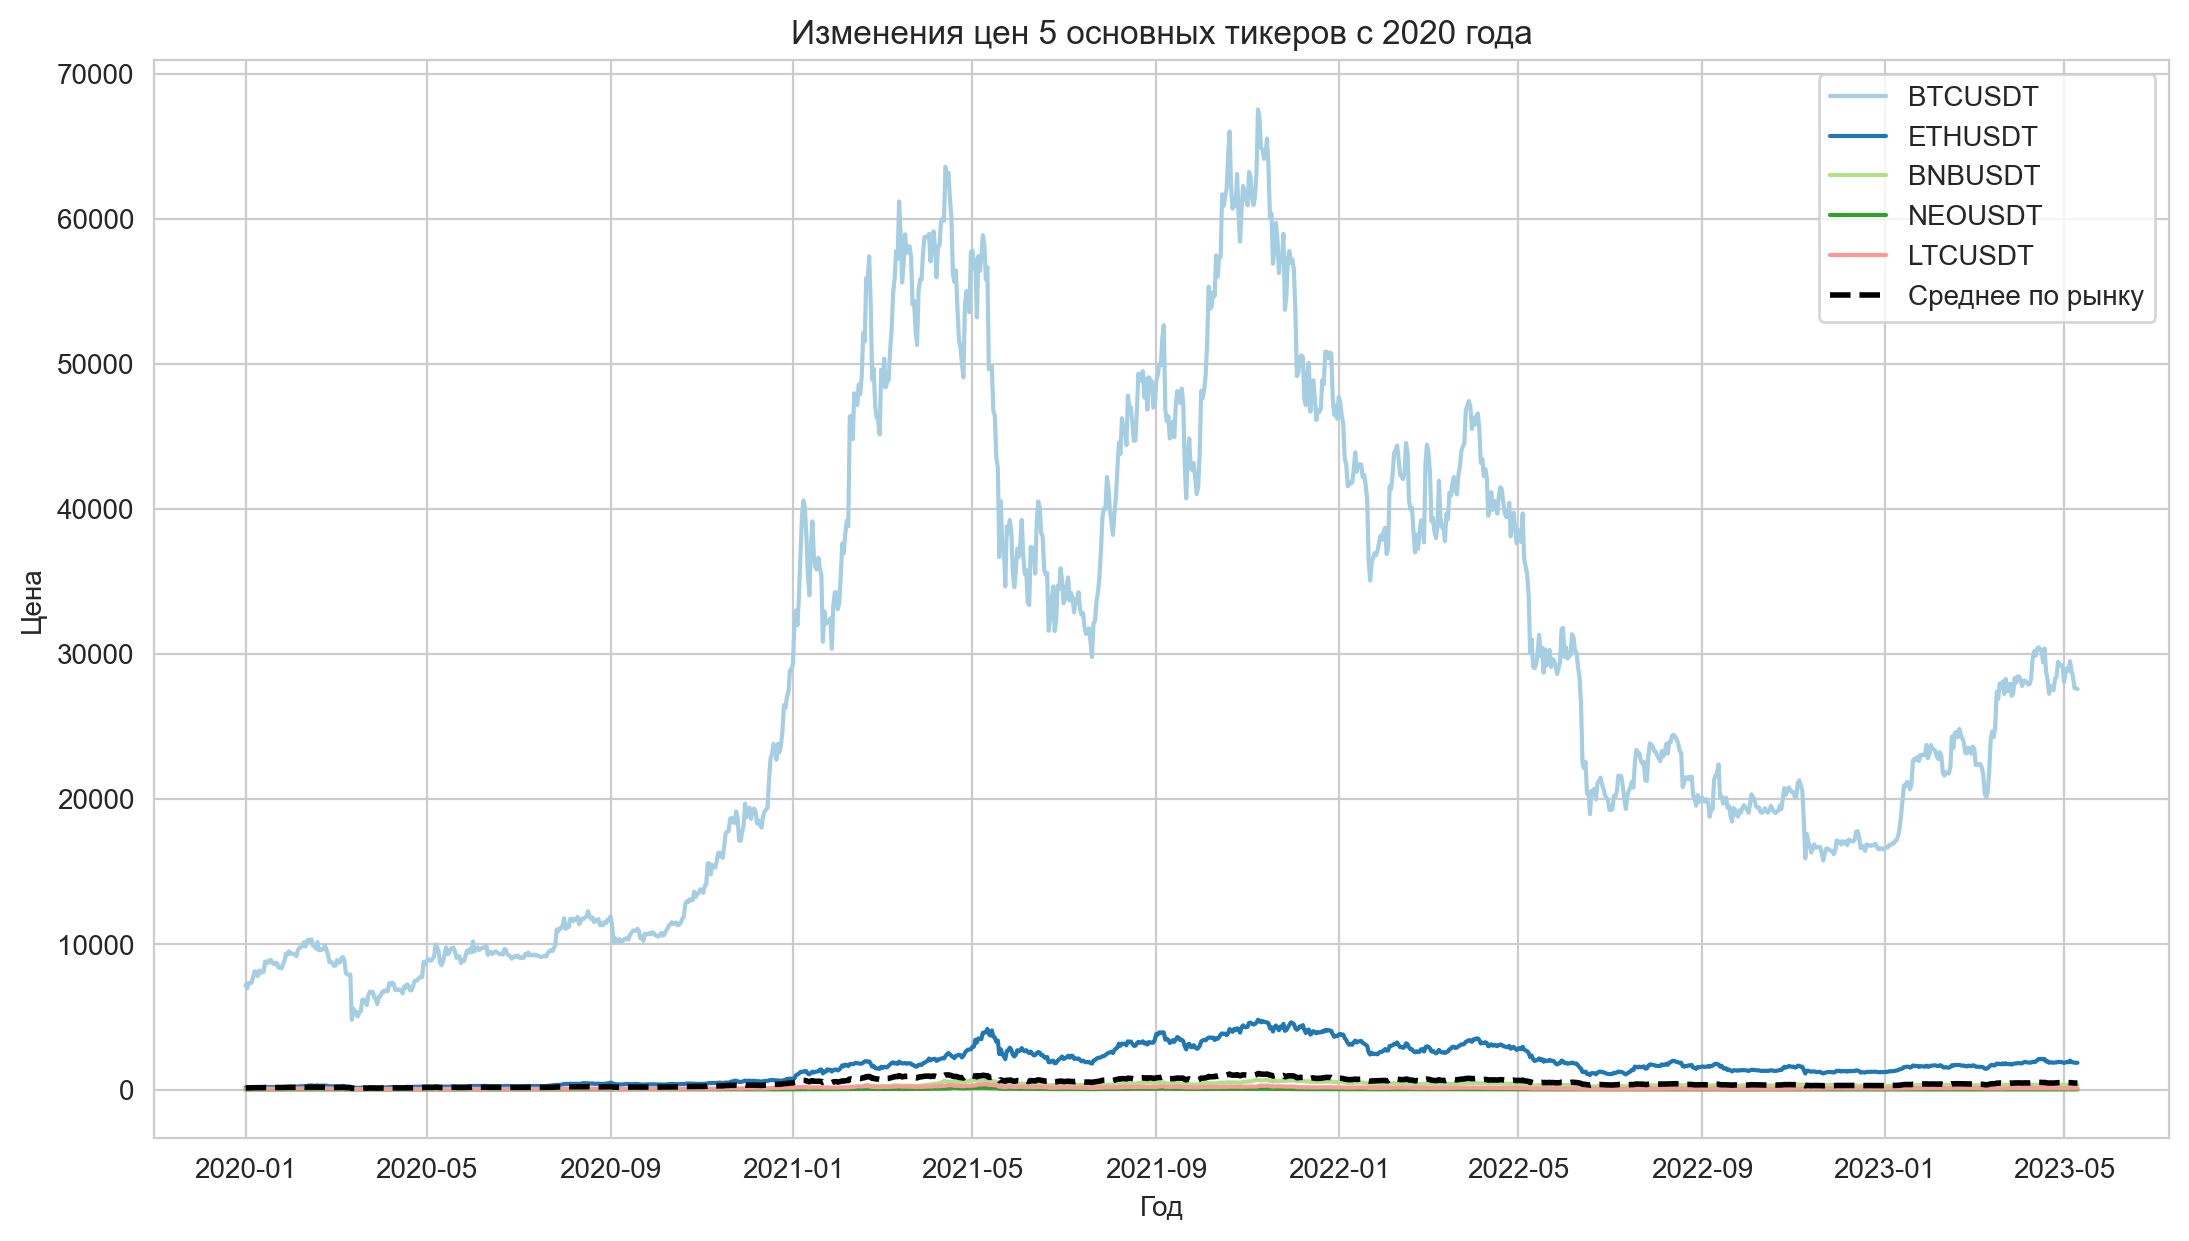

In [112]:
# С учетом биткойна
fig, ax = plt.subplots(figsize=(13, 7))
ax.plot(df.index, df[tickers], label=tickers)   
ax.plot(df.index, mean_prices, label='Среднее по рынку',
        c='black', lw=2, ls='--')
ax.set_title('Изменения цен 5 основных тикеров с 2020 года')
ax.set_xlabel('Год')
ax.set_ylabel('Цена')
ax.legend()
plt.show()

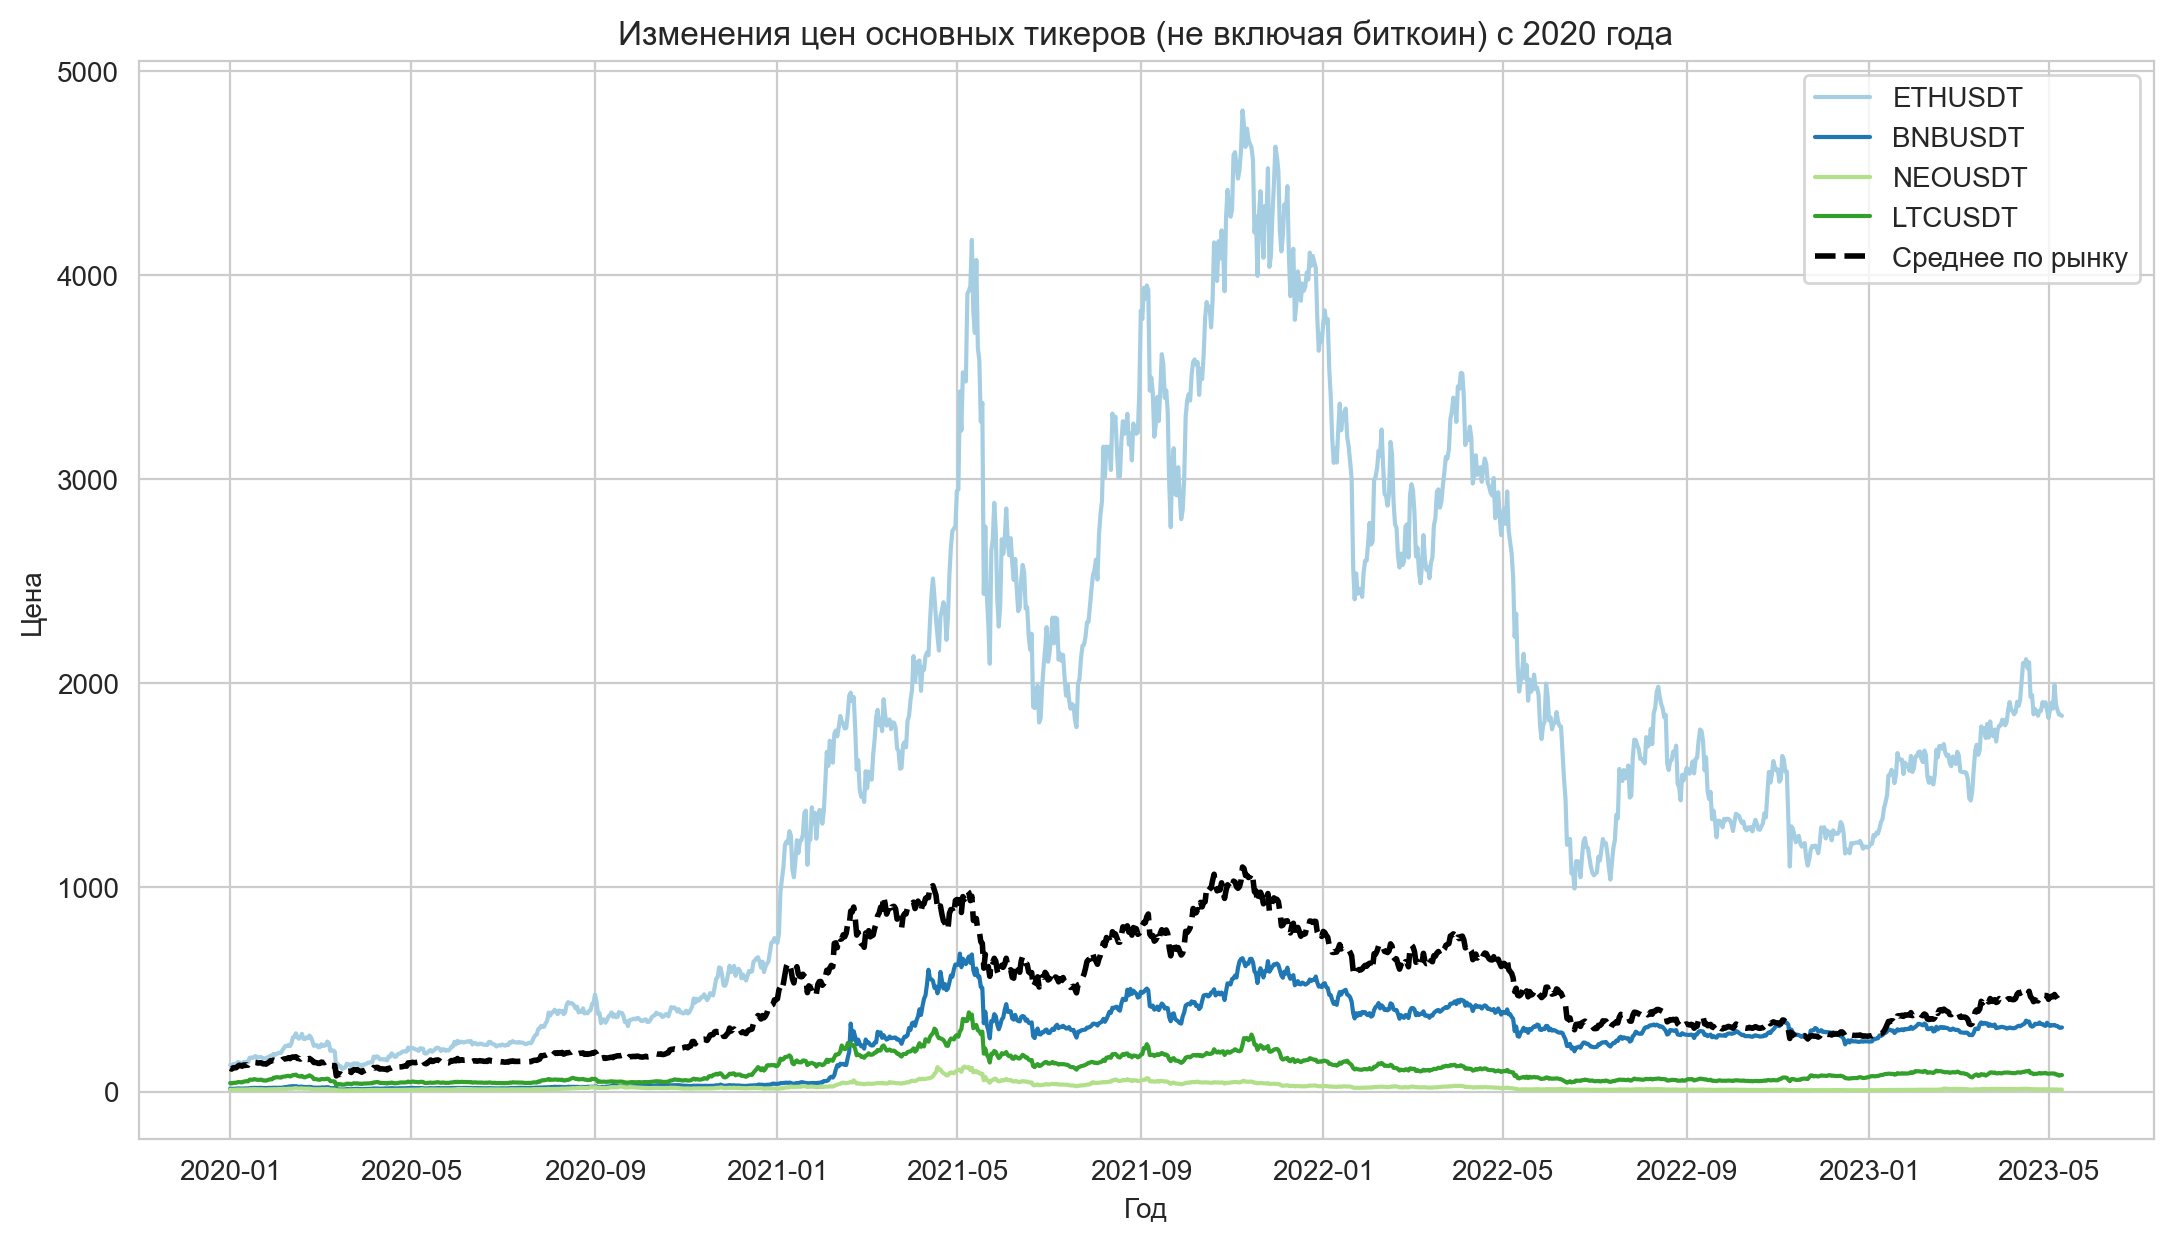

In [113]:
# Без учета биткойна
fig, ax = plt.subplots(figsize=(13, 7))
ax.plot(df.index, df[tickers_without_bitcoin], label=tickers_without_bitcoin)   
ax.plot(df.index, mean_prices, label='Среднее по рынку', 
        c='black', lw=2, ls='--')
ax.set_title('Изменения цен основных тикеров (не включая биткоин) с 2020 года')
ax.set_xlabel('Год')
ax.set_ylabel('Цена')
ax.legend()
plt.show()

Сравнив 2 полученные картинки, заметно, что котировки биткоина намного более масштабны по сравнению с другими рассмотренными криптовалютами, что во многом объясняется разнообразием сфер его применения, широчайшей всемирной известностью и популярностью среди неквалифицированных инвесторов. 

Однако общие тенденции динамики цен биткоина и других рассмотренных криптовалют сохраняются.

<font color='green' size=3>**Вывод**</font>

В течение последних 3 динамика рынка криптовалют была довольно неодназначной. Однако можно сказать, что с начала 2020 года к маю 2023 года цены криптовалют выросли (хорошо видно на примере 3 из 5 рассмотренных криптовалют: BTC, ETH, BNB). 


Сперва можно наблюдать довольно успешное восстановление крипторынка после пандемии covid-19 в 2020 году. Затем можно наблюдать значительный спад в конце весны 2021 года, связанный с тем, что: биткоин обвалился более чем на 30% до 30 тысяч, т.к. Илон Маск отказался принимать платежи в виде биткоина в Tesla - отчасти из-за запретов на цифровые активы в Китае и того, что их майнинг вредит окружающей среде, а эфир стал стоить менее $2000, упав на 44%, из-за этого, прикрываясь разными причинами, криптобиржи временно приостанавливали покупку и вывод средств. Далее значимый кризис наблюдался в начале 2022 года, по причине напряженной политической обстановки в Казахстане и началом СВО. Следующий кризис, наблюдаемиый весной 2022, стали называть системным из-за падения доверия инвесторов к крипторынку на фоне скандала вокруг биржи FTX — четвертой среди крупнейших бирж по торговле криптовалютами, связанного с недостаточным риск-менеджментом, что в период борьбы с инфляцией в Америке и повышением ключевой ставки сильно сказалось на котировках криптовалют.

Все эти кризисы отразились на графиках динамики цен рассмотренных криптовалют как резкие скачки в сторону понижения их цен.  

<font color='green' size=3>****plotly.express****</font>

Для более удобного и наглядного представления данных построим те же графики в plotly.express

In [114]:
import plotly.graph_objects as go

In [115]:
fig = px.line(
    df,
    x = df.index,
    y = ['BTCUSDT','ETHUSDT', 'BNBUSDT','NEOUSDT', 'LTCUSDT'],
    title ='Изменение цены 5 основных криптовалют с 2020 года'
)
trace = go.Scatter(x=df.index, y = mean_prices, name = 'mean')
fig.add_trace(trace)

fig.show()

In [116]:
fig = px.line(
    df,
    x = df.index,
    y = ['ETHUSDT', 'BNBUSDT','NEOUSDT', 'LTCUSDT'],
    title ='Изменение цены основных криптовалют (без биткоина) с 2020 года'
)
trace = go.Scatter(x = df.index, y = mean_prices, name = 'mean') 
fig.add_trace(trace)

fig.show()

In [117]:
# Строим гистограммы цен
from itertools import combinations
axs = sorted(list(combinations([0, 1, 2], 2)) +
             list(zip([0, 1, 2], [0, 1, 2])))[:-1]

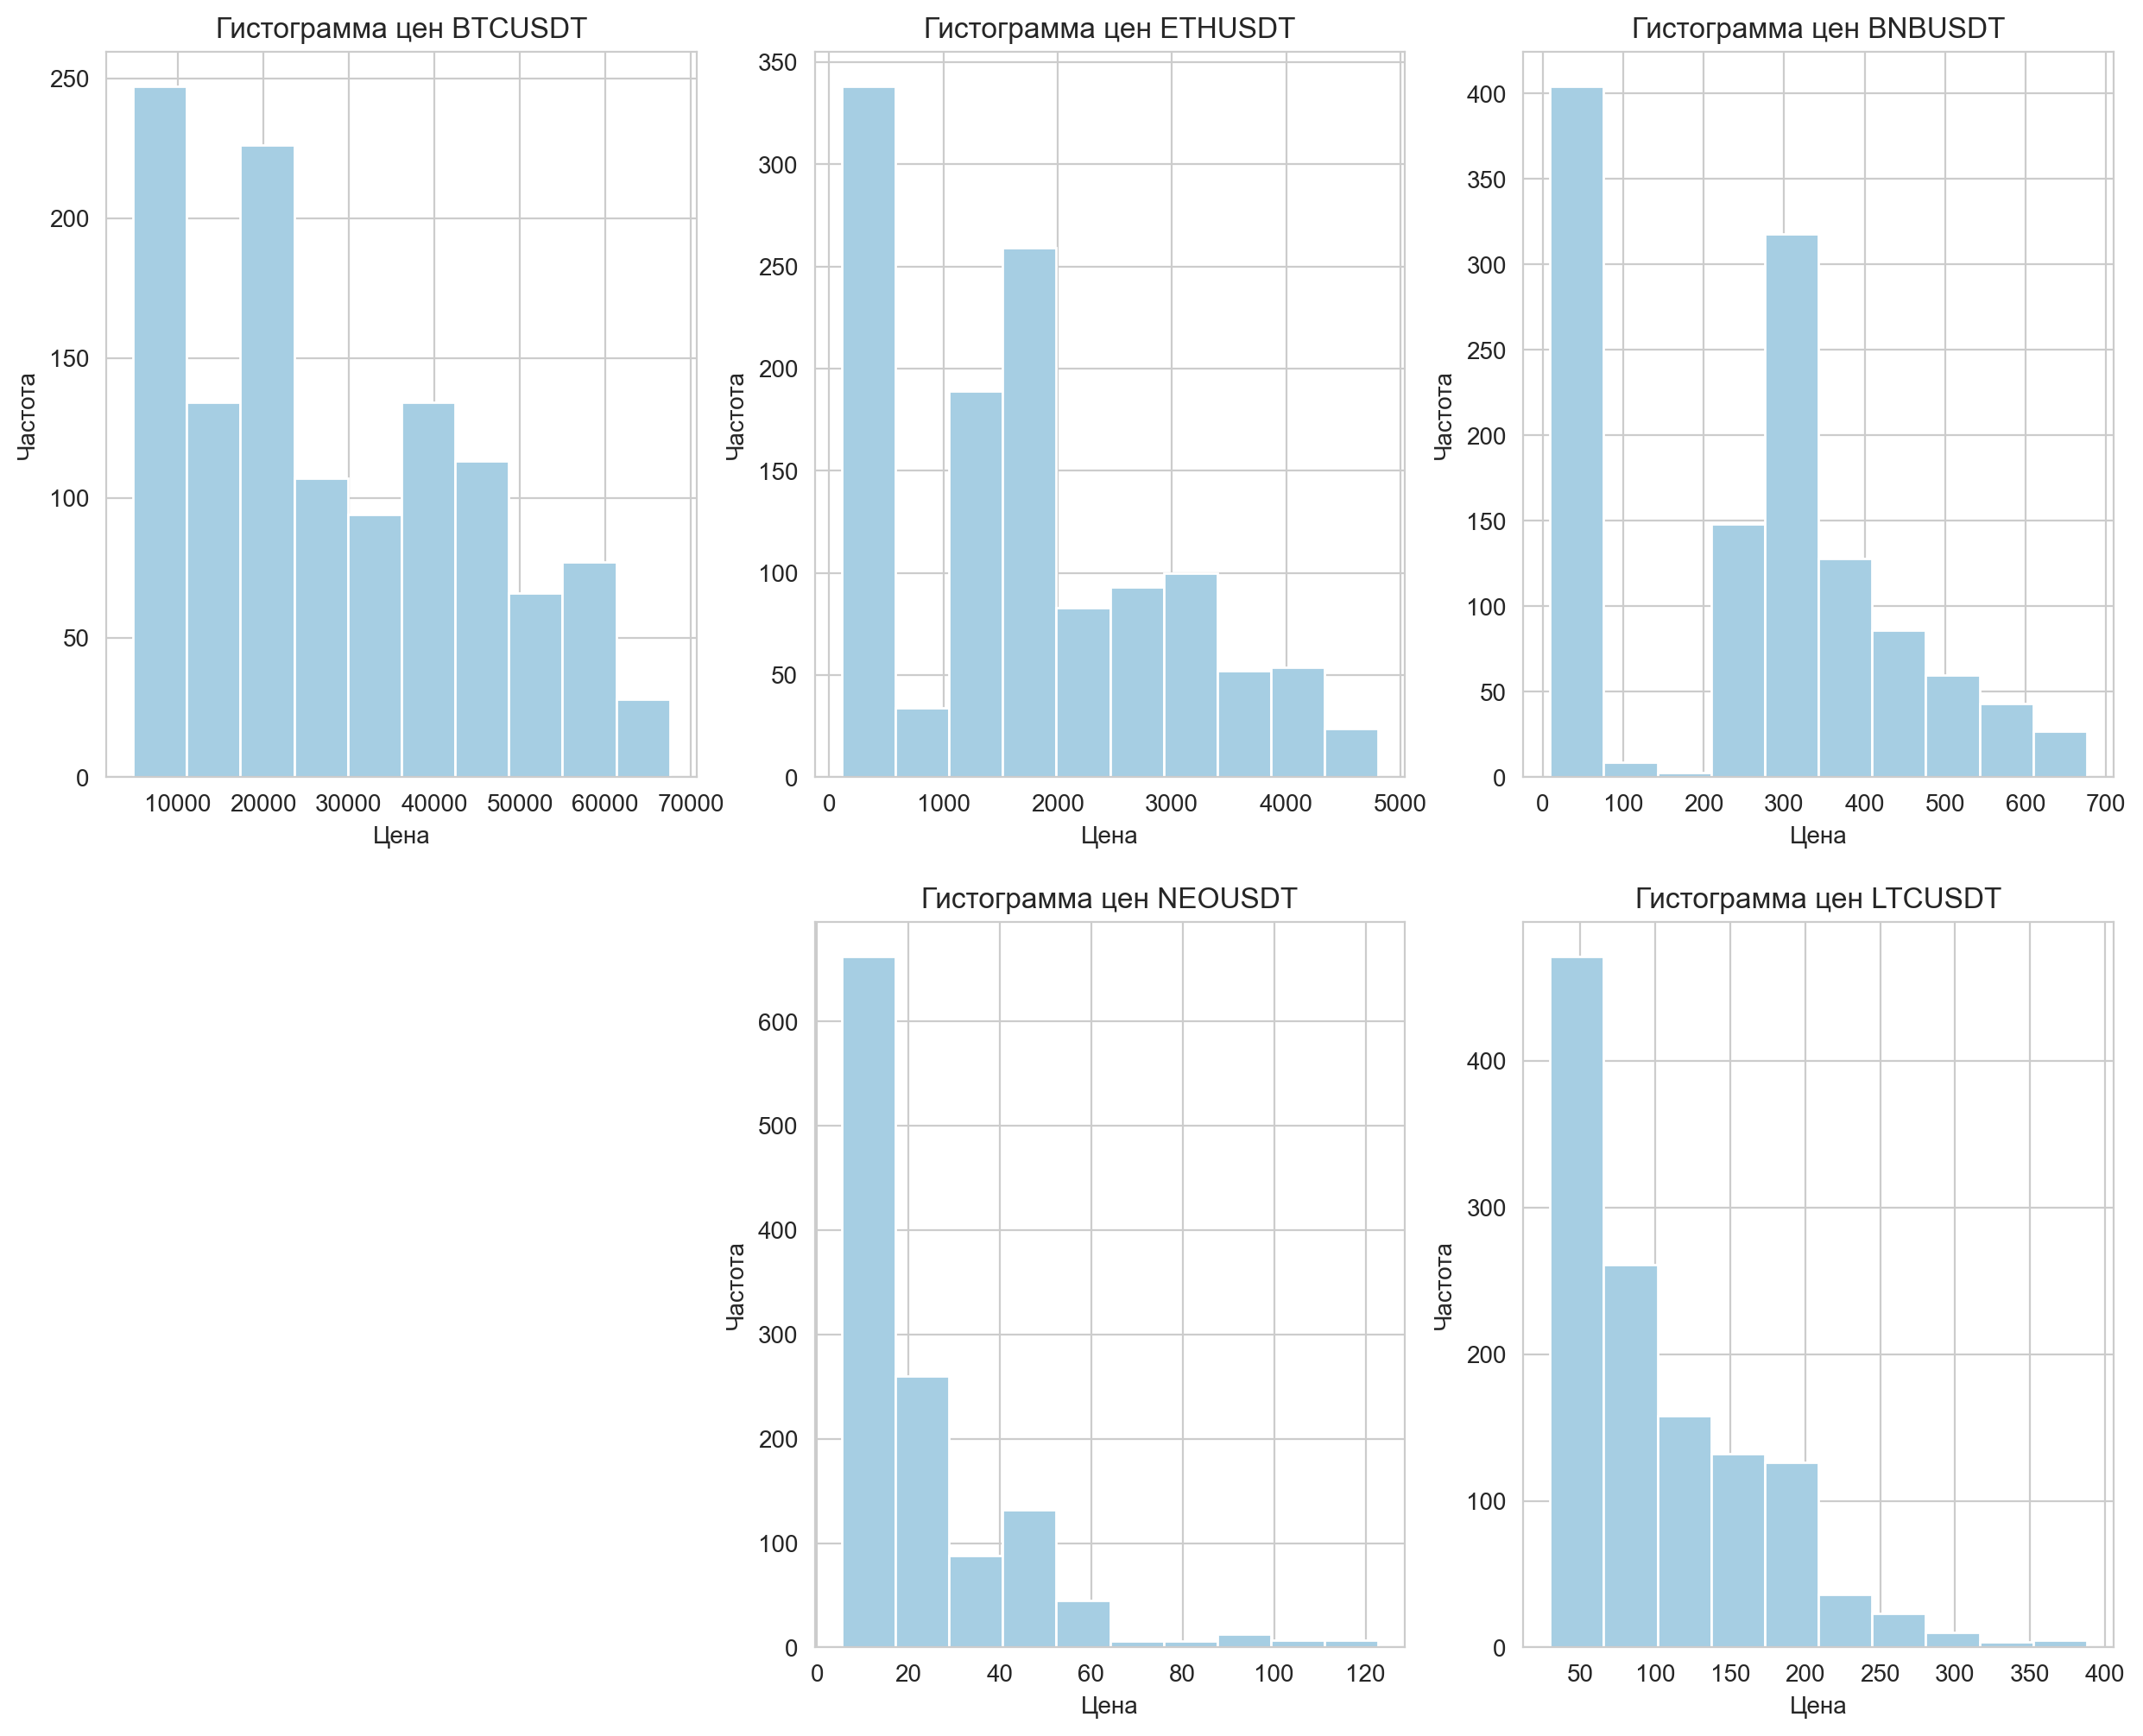

In [118]:
fig, ax = plt.subplots(2, 3, figsize=(15, 12))
for i in axs:
    ind = axs.index(i)
    ax[i].hist(df[tickers[ind]])
    ax[i].set_title(f'Гистограмма цен {tickers[ind]}')
    ax[i].set_xlabel(f'Цена')
    ax[i].set_ylabel(f'Частота')
    
ax[(1, 0)].axis('off')
plt.show()

Распределение цен криптовалют не похоже на нормальное.

<font color=blue size=5>****Нормирование данных. Логарифмирование****</font>


Для того чтобы более наглядно визуализировать динамику цен криптовалют, можно рассмотерть логарифмы цен, что позволит сгладить различия между биткоином и другими тикерами.

In [119]:
# Логарифмируем цены криптовалют
from math import log

df_log = pd.DataFrame()
df_log = df.copy()

col = df_log.columns.values.tolist()

for item in col:
    df_log[item] = df_log[item].apply(log)

df_log

BTCUSDT   ETHUSDT   BNBUSDT   NEOUSDT   LTCUSDT  QTUMUSDT  \
Date                                                                      
2020-01-01   8.881954  4.873440  2.618738  2.180417  3.728581  0.471877   
2020-01-02   8.848755  4.845682  2.565757  2.135586  3.674527  0.427227   
2020-01-03   8.901770  4.900448  2.613549  2.184702  3.743131  0.487966   
2020-01-04   8.903015  4.899331  2.625335  2.205744  3.756071  0.495915   
2020-01-05   8.903645  4.908012  2.642850  2.199444  3.768153  0.489193   
...               ...       ...       ...       ...       ...       ...   
2023-05-06  10.269803  7.547676  5.774241  2.303585  4.421968  1.021371   
2023-05-07  10.255204  7.533908  5.771441  2.290513  4.423888  0.999528   
2023-05-08  10.228060  7.521621  5.748756  2.211566  4.352984  0.945850   
2023-05-09  10.226595  7.521058  5.743324  2.225704  4.380776  0.959350   
2023-05-10  10.225526  7.517977  5.750348  2.265921  4.393585  0.971536   

             ADAUSDT   XRPUSDT   EOSUSDT  IOTAUSDT  ...   NKNUSDT   STXUSDT  \
Date                                                ...                       
2020-01-01 -3.396807 -1.644806  0.957010 -1.828838  ... -4.012396 -2.313646   
2020-01-02 -3.420686 -1.673976  0.899877 -1.842632  ... -3.992691 -2.411285   
2020-01-03 -3.376407 -1.643098  0.970627 -1.793361  ... -4.006334 -2.359155   
2020-01-04 -3.371444 -1.644806  0.973842 -1.752154  ... -4.025752 -2.360214   
2020-01-05 -3.363902 -1.637169  0.988239 -1.761424  ... -3.980302 -2.385967   
...              ...       ...       ...       ...  ...       ...       ...   
2023-05-06 -0.971011 -0.780450 -0.017146 -1.649739  ... -2.239610 -0.356675   
2023-05-07 -0.978166 -0.800732 -0.031491 -1.651302  ... -2.248097 -0.312795   
2023-05-08 -1.007036 -0.847931 -0.098716 -1.713133  ... -2.383795 -0.299755   
2023-05-09 -1.012526 -0.846531 -0.084469 -1.717023  ... -2.350725 -0.368458   
2023-05-10 -0.996146 -0.843273 -0.091019 -1.714243  ... -2.330985 -0.410377   

            KAVAUSDT  ARPAUSDT  IOTXUSDT   RLCUSDT  CTXCUSDT   BCHUSDT  \
Date                                                                     
2020-01-01  0.127865 -4.543135 -5.667354 -0.872992 -2.748872  5.320275   
2020-01-02  0.017054 -4.620284 -5.696410 -0.977103 -2.790345  5.275509   
2020-01-03  0.023814 -4.598195 -5.681043 -0.906093 -2.759870  5.404612   
2020-01-04  0.039317 -4.583409 -5.642781 -0.921052 -2.662121  5.413742   
2020-01-05  0.030529 -4.597202 -5.636591 -0.903868 -2.706052  5.406230   
...              ...       ...       ...       ...       ...       ...   
2023-05-06 -0.322964 -3.229684 -3.747781  0.590561 -1.708154  4.762174   
2023-05-07 -0.320205 -3.153556 -3.758873  0.565314 -1.713688  4.754452   
2023-05-08 -0.294371 -3.238823 -3.804964  0.515813 -1.804237  4.710431   
2023-05-09 -0.220647 -3.236531 -3.803617  0.431133 -1.787967  4.805659   
2023-05-10 -0.119910 -3.111592 -3.781872  0.455524 -1.799993  4.751865   

            TROYUSDT  VITEUSDT  
Date                            
2020-01-01 -4.993970 -4.506230  
2020-01-02 -5.039791 -4.564028  
2020-01-03 -5.046454 -4.489167  
2020-01-04 -5.051301 -4.448166  
2020-01-05 -5.025485 -4.501711  
...              ...       ...  
2023-05-06 -5.831729 -3.915529  
2023-05-07 -5.846499 -3.924096  
2023-05-08 -5.941532 -4.065174  
2023-05-09 -5.941913 -4.048416  
2023-05-10 -5.921938 -4.016273  

[1226 rows x 68 columns]

In [120]:
tickers = ['BTCUSDT','ETHUSDT', 'BNBUSDT', 'NEOUSDT', 'LTCUSDT']
mean_prices_log = df_log.mean(axis=1)

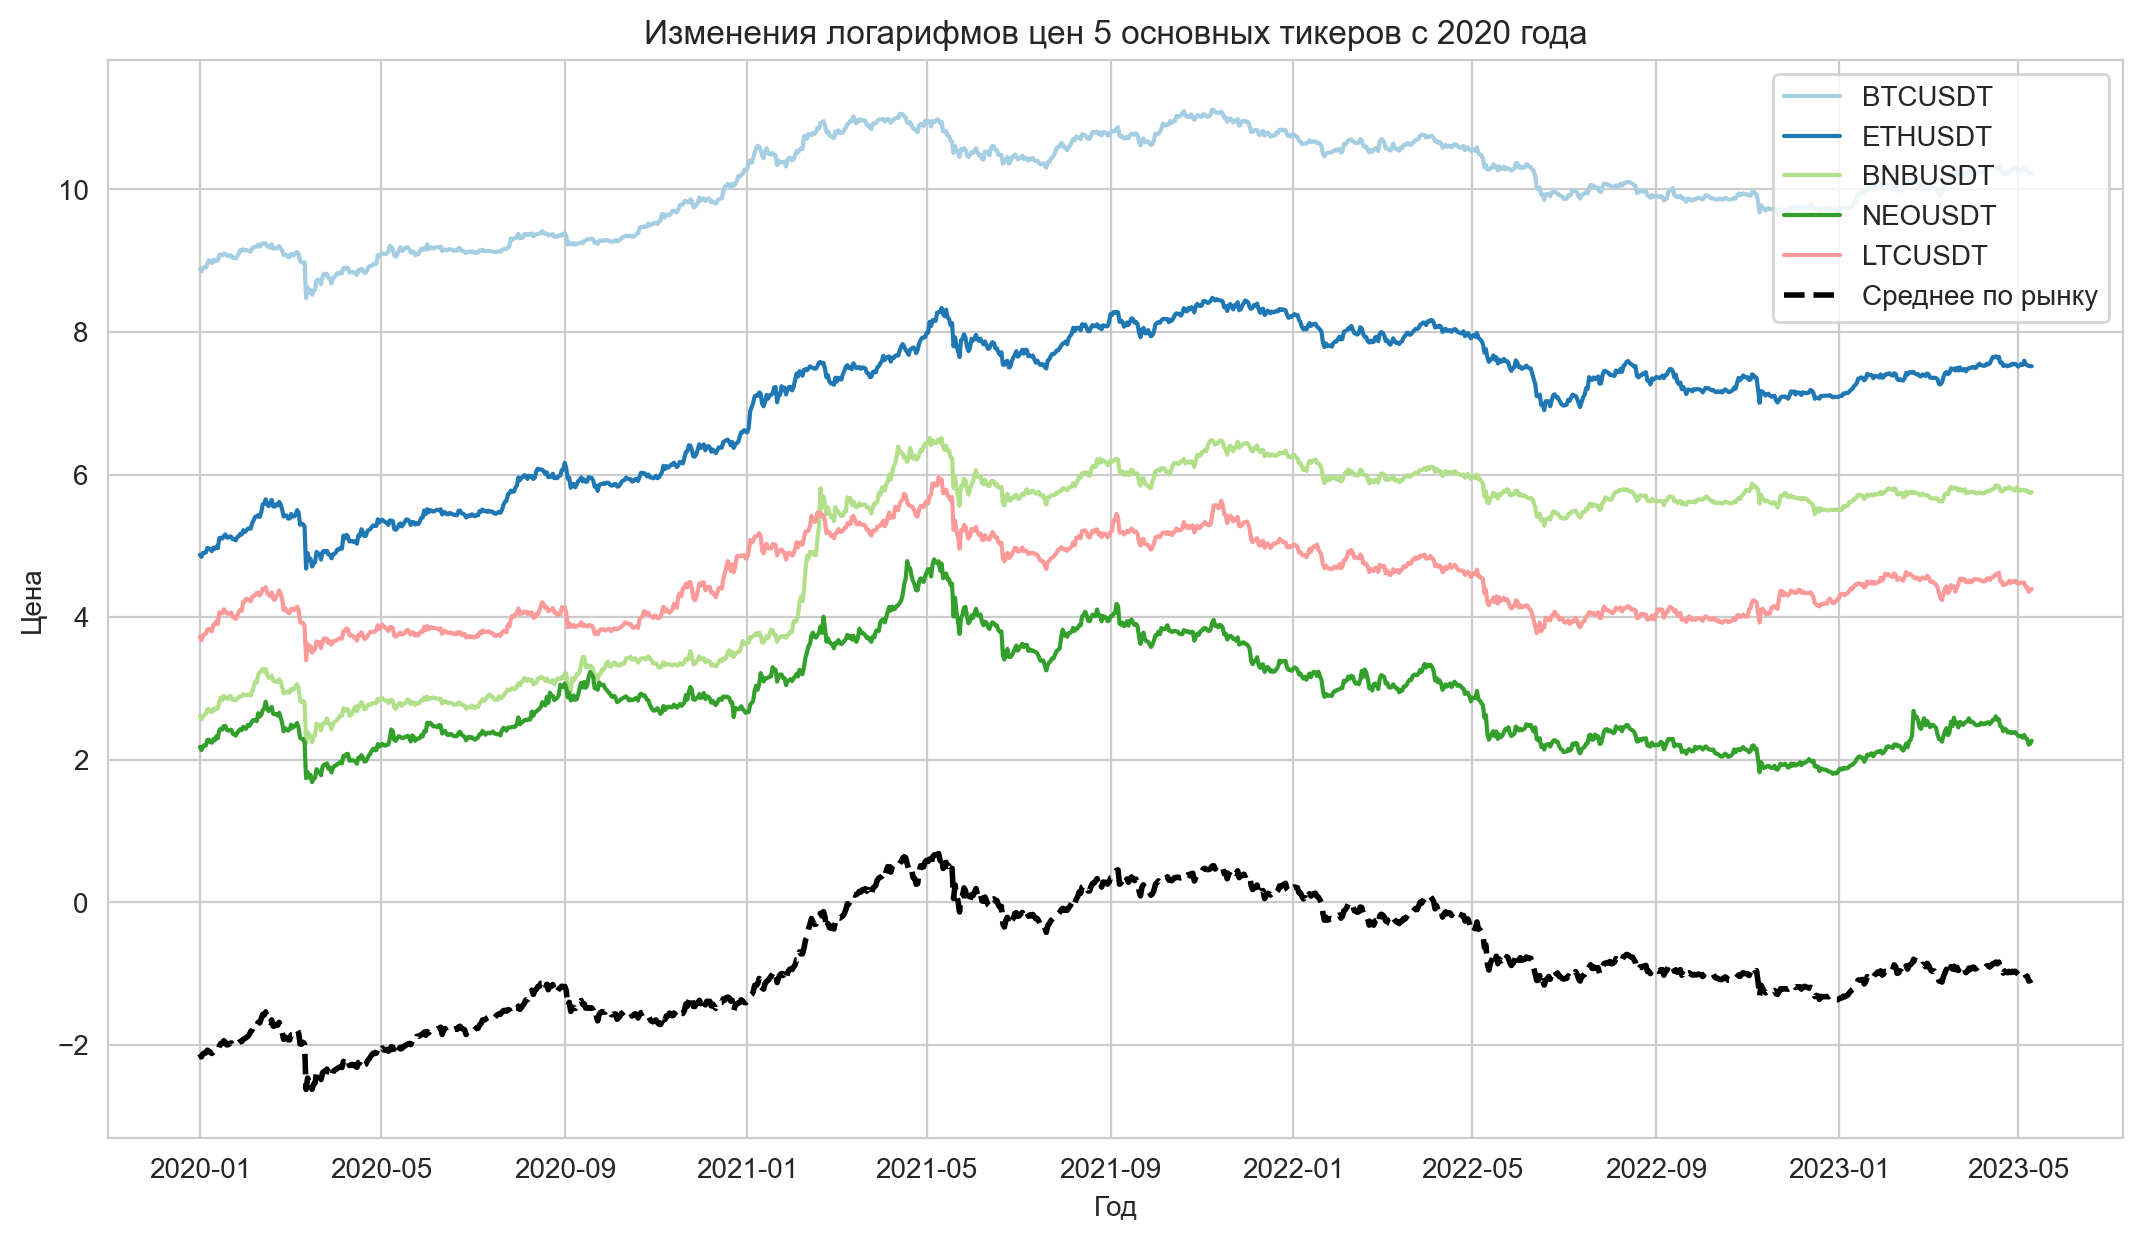

In [121]:
# Динамика логарифмов цен 
fig, ax = plt.subplots(figsize=(13, 7))
ax.plot(df_log.index, df_log[tickers], label=tickers)   
ax.plot(df_log.index, mean_prices_log, label='Среднее по рынку',
        c='black', lw=2, ls='--')
ax.set_title('Изменения логарифмов цен 5 основных тикеров с 2020 года')
ax.set_xlabel('Год')
ax.set_ylabel('Цена')
ax.legend()
plt.show()

На данном графике динамика цен биткоина уже не настолько масштабна по сравнению с прочими рассмотренными криптовалютами.

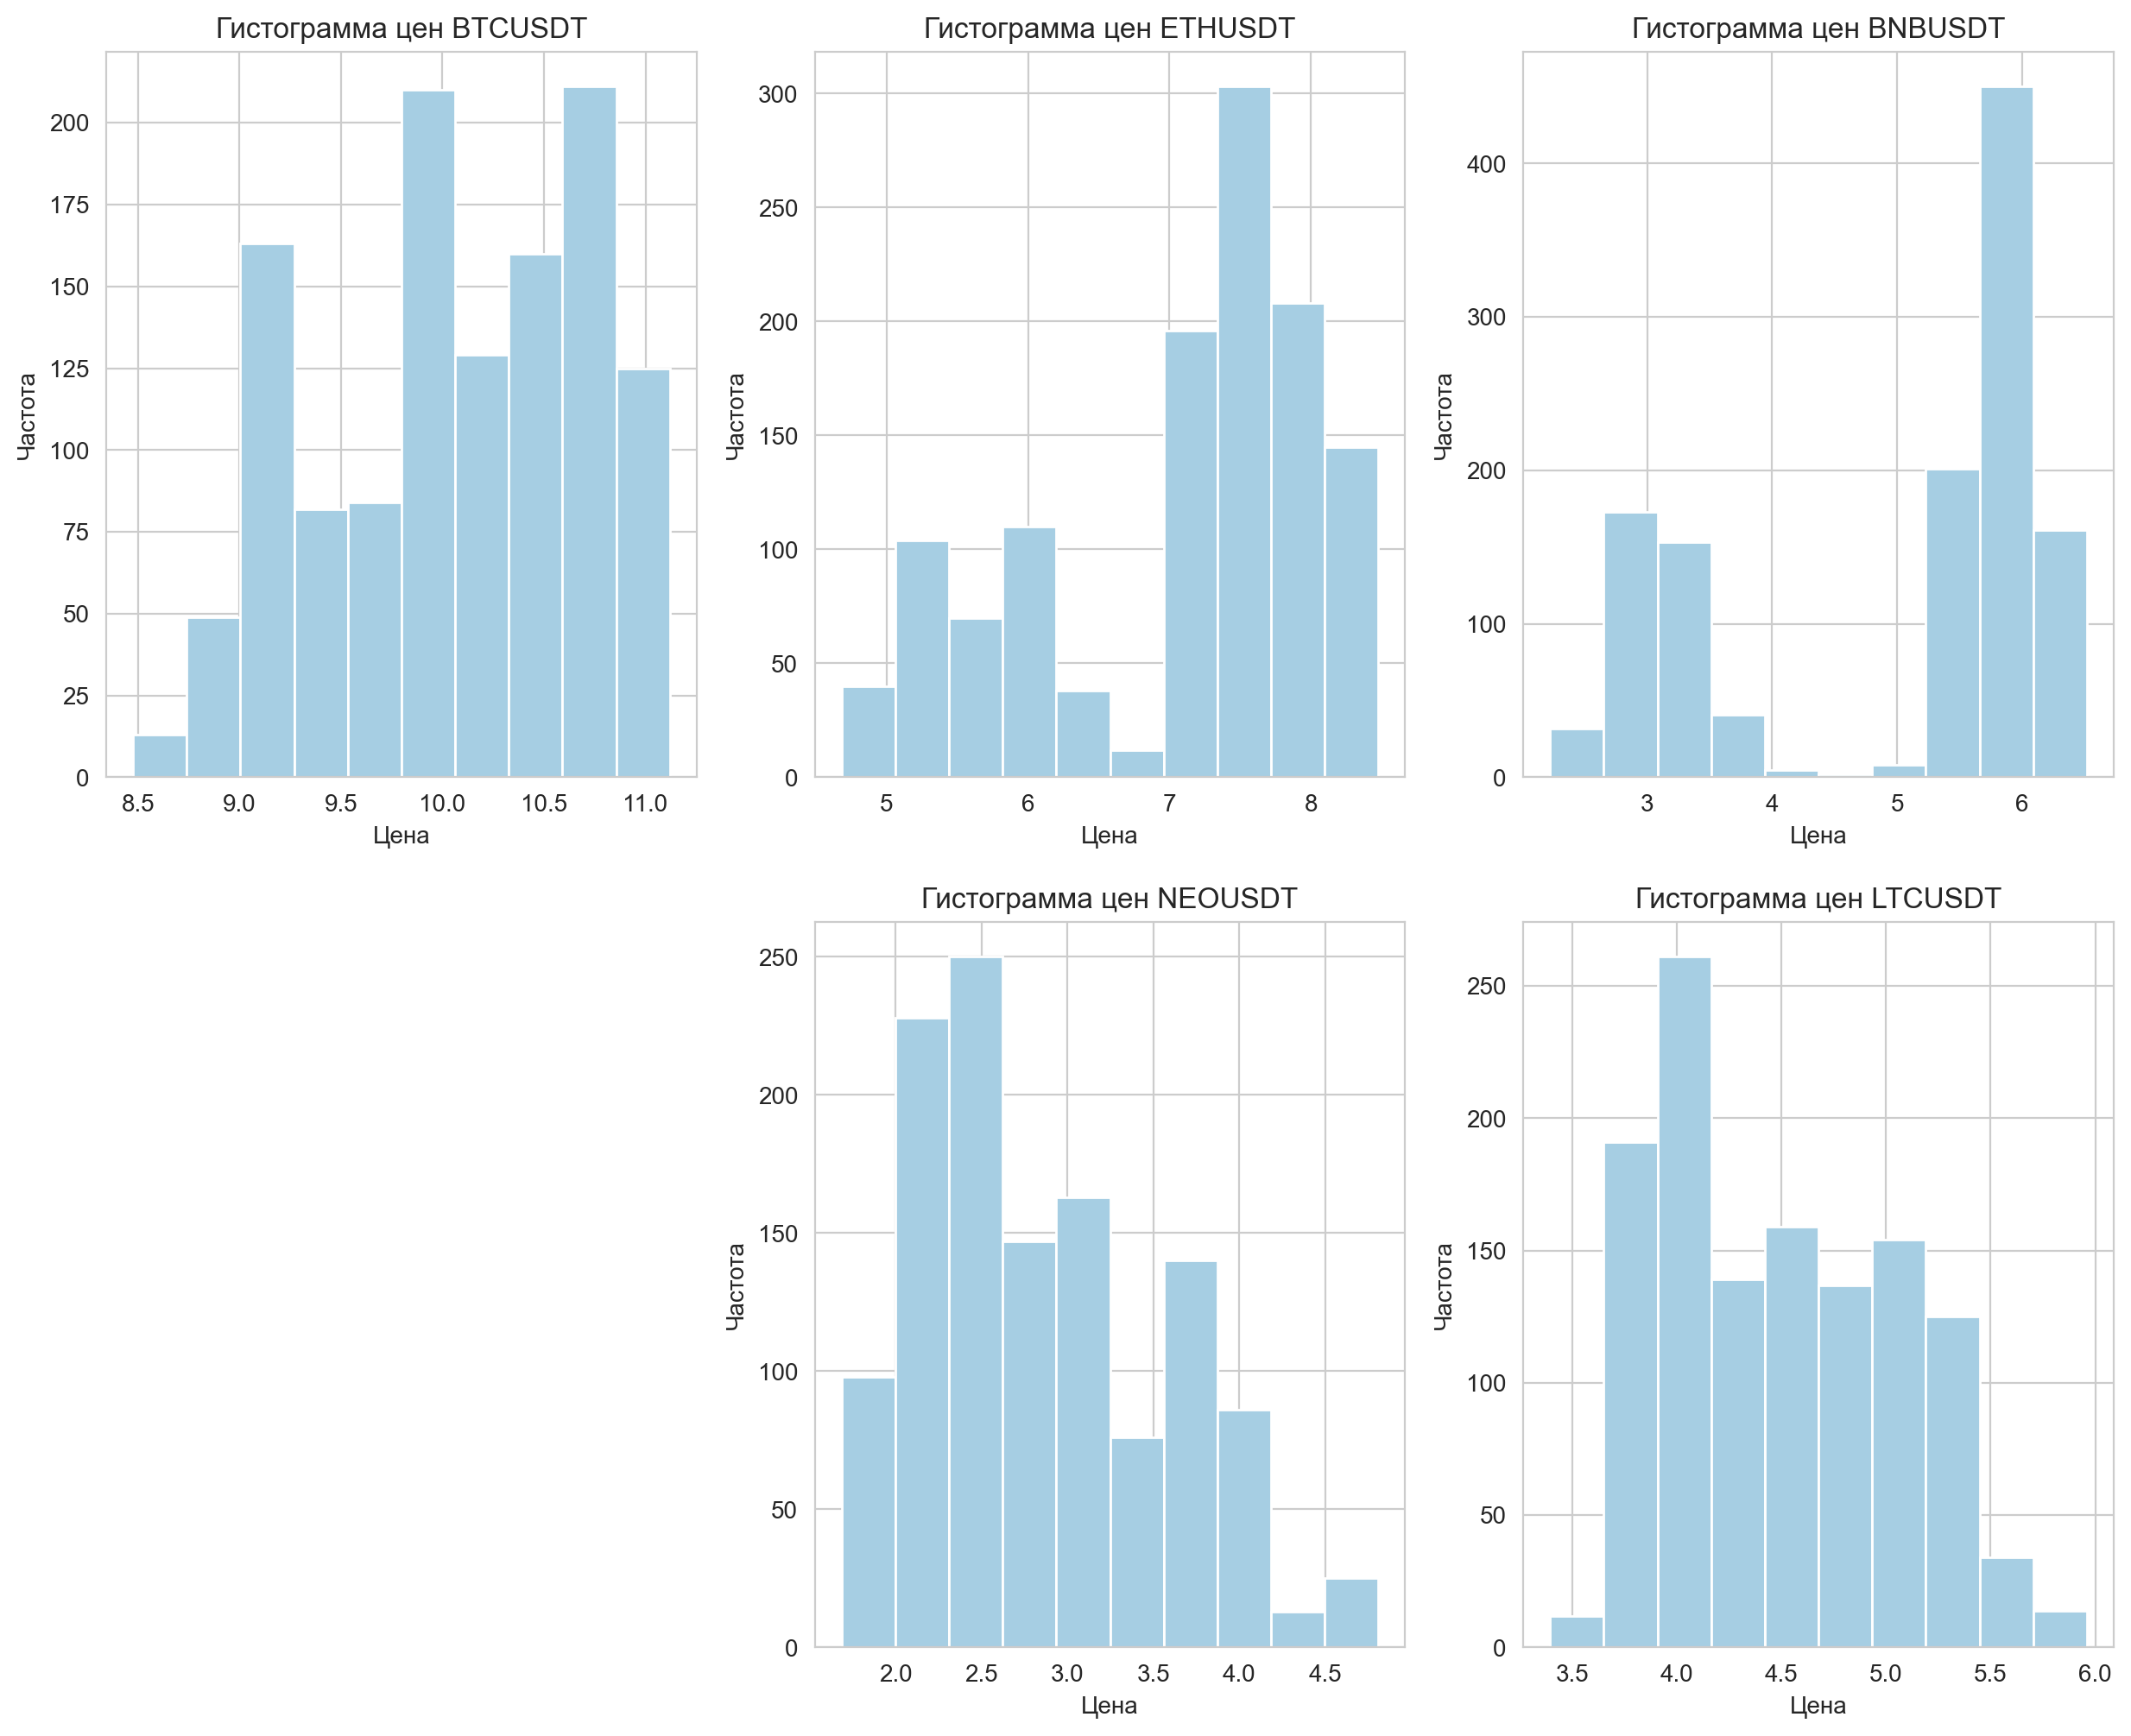

In [122]:
# Гистограммы логарифмов цен
fig, ax = plt.subplots(2, 3, figsize=(15, 12))
for i in axs:
    ind = axs.index(i)
    ax[i].hist(df_log[tickers[ind]])
    ax[i].set_title(f'Гистограмма цен {tickers[ind]}')
    ax[i].set_xlabel(f'Цена')
    ax[i].set_ylabel(f'Частота')
    
ax[(1, 0)].axis('off')
plt.show()

Распределение цен криптовалют не похоже на нормальное.

<font color='red' size=6>****Новые признаки****</font>



<font color='blue' size=5>****Доходность****</font>

Рассмотрение рыночных показателей криптовалют начнем с доходности

Доходность – это процентное изменение стоимости за некоторый промежуток времени. Мы будем работать с доходностями за день: 

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$



Посчитаем разность между каждой строкой таблицы и предыдущей строкой, используя команду `.diff()`. Чтобы сдвинуть все строки на одну вниз, используем команду `shift(1)`.  

Поделим результат работы команды `diff` на результат работы команды `shift`. В первой колонке теперь все значения `NaN`, так как мы не можем посчитать доходность для самого первого дня. Удалим из таблицы эту строку. 

In [123]:
diff = df.diff()
shift = df.shift(1)
df_r = (diff / shift)
df_r.drop(index=df_r.index[0], inplace=True)
df_r.head()

BTCUSDT   ETHUSDT   BNBUSDT   NEOUSDT   LTCUSDT  QTUMUSDT  \
Date                                                                     
2020-01-02 -0.032654 -0.027376 -0.051602 -0.043842 -0.052619 -0.043668   
2020-01-03  0.054445  0.056294  0.048953  0.050343  0.071012  0.062622   
2020-01-04  0.001246 -0.001116  0.011856  0.021265  0.013024  0.007980   
2020-01-05  0.000631  0.008718  0.017669 -0.006280  0.012155 -0.006699   
2020-01-06  0.054255  0.064859  0.063608  0.081707  0.057737  0.071122   

             ADAUSDT   XRPUSDT   EOSUSDT  IOTAUSDT  ...   NKNUSDT   STXUSDT  \
Date                                                ...                       
2020-01-02 -0.023596 -0.028749 -0.055532 -0.013699  ...  0.019900 -0.093023   
2020-01-03  0.045274  0.031360  0.073314  0.050505  ... -0.013550  0.053512   
2020-01-04  0.004975 -0.001706  0.003220  0.042067  ... -0.019231 -0.001058   
2020-01-05  0.007571  0.007666  0.014501 -0.009227  ...  0.046499 -0.025424   
2020-01-06  0.078613  0.146867  0.061083  0.062864  ... -0.016595  0.044565   

            KAVAUSDT  ARPAUSDT  IOTXUSDT   RLCUSDT  CTXCUSDT   BCHUSDT  \
Date                                                                     
2020-01-02 -0.104893 -0.074248 -0.028638 -0.098875 -0.040625 -0.043778   
2020-01-03  0.006783  0.022335  0.015485  0.073592  0.030945  0.137808   
2020-01-04  0.015623  0.014896  0.039003 -0.014848  0.102686  0.009171   
2020-01-05 -0.008749 -0.013699  0.006209  0.017332 -0.042980 -0.007484   
2020-01-06  0.021242 -0.008929  0.056662 -0.024444  0.007485  0.096324   

            TROYUSDT  VITEUSDT  
Date                            
2020-01-02 -0.044787 -0.056159  
2020-01-03 -0.006641  0.077735  
2020-01-04 -0.004835  0.041852  
2020-01-05  0.026152 -0.052137  
2020-01-06 -0.018909  0.031560  

[5 rows x 68 columns]

****Визуализация****

Теперь возьмем 5 основых криптовалют (BTCUSDT, ETHUSDT, BNBUSDT, NEOUSDT, LTCUSDT - на Бинансе это 5 первых) и построим для них визуализацию динамики доходностей, гистограммы и ящики с усами. 

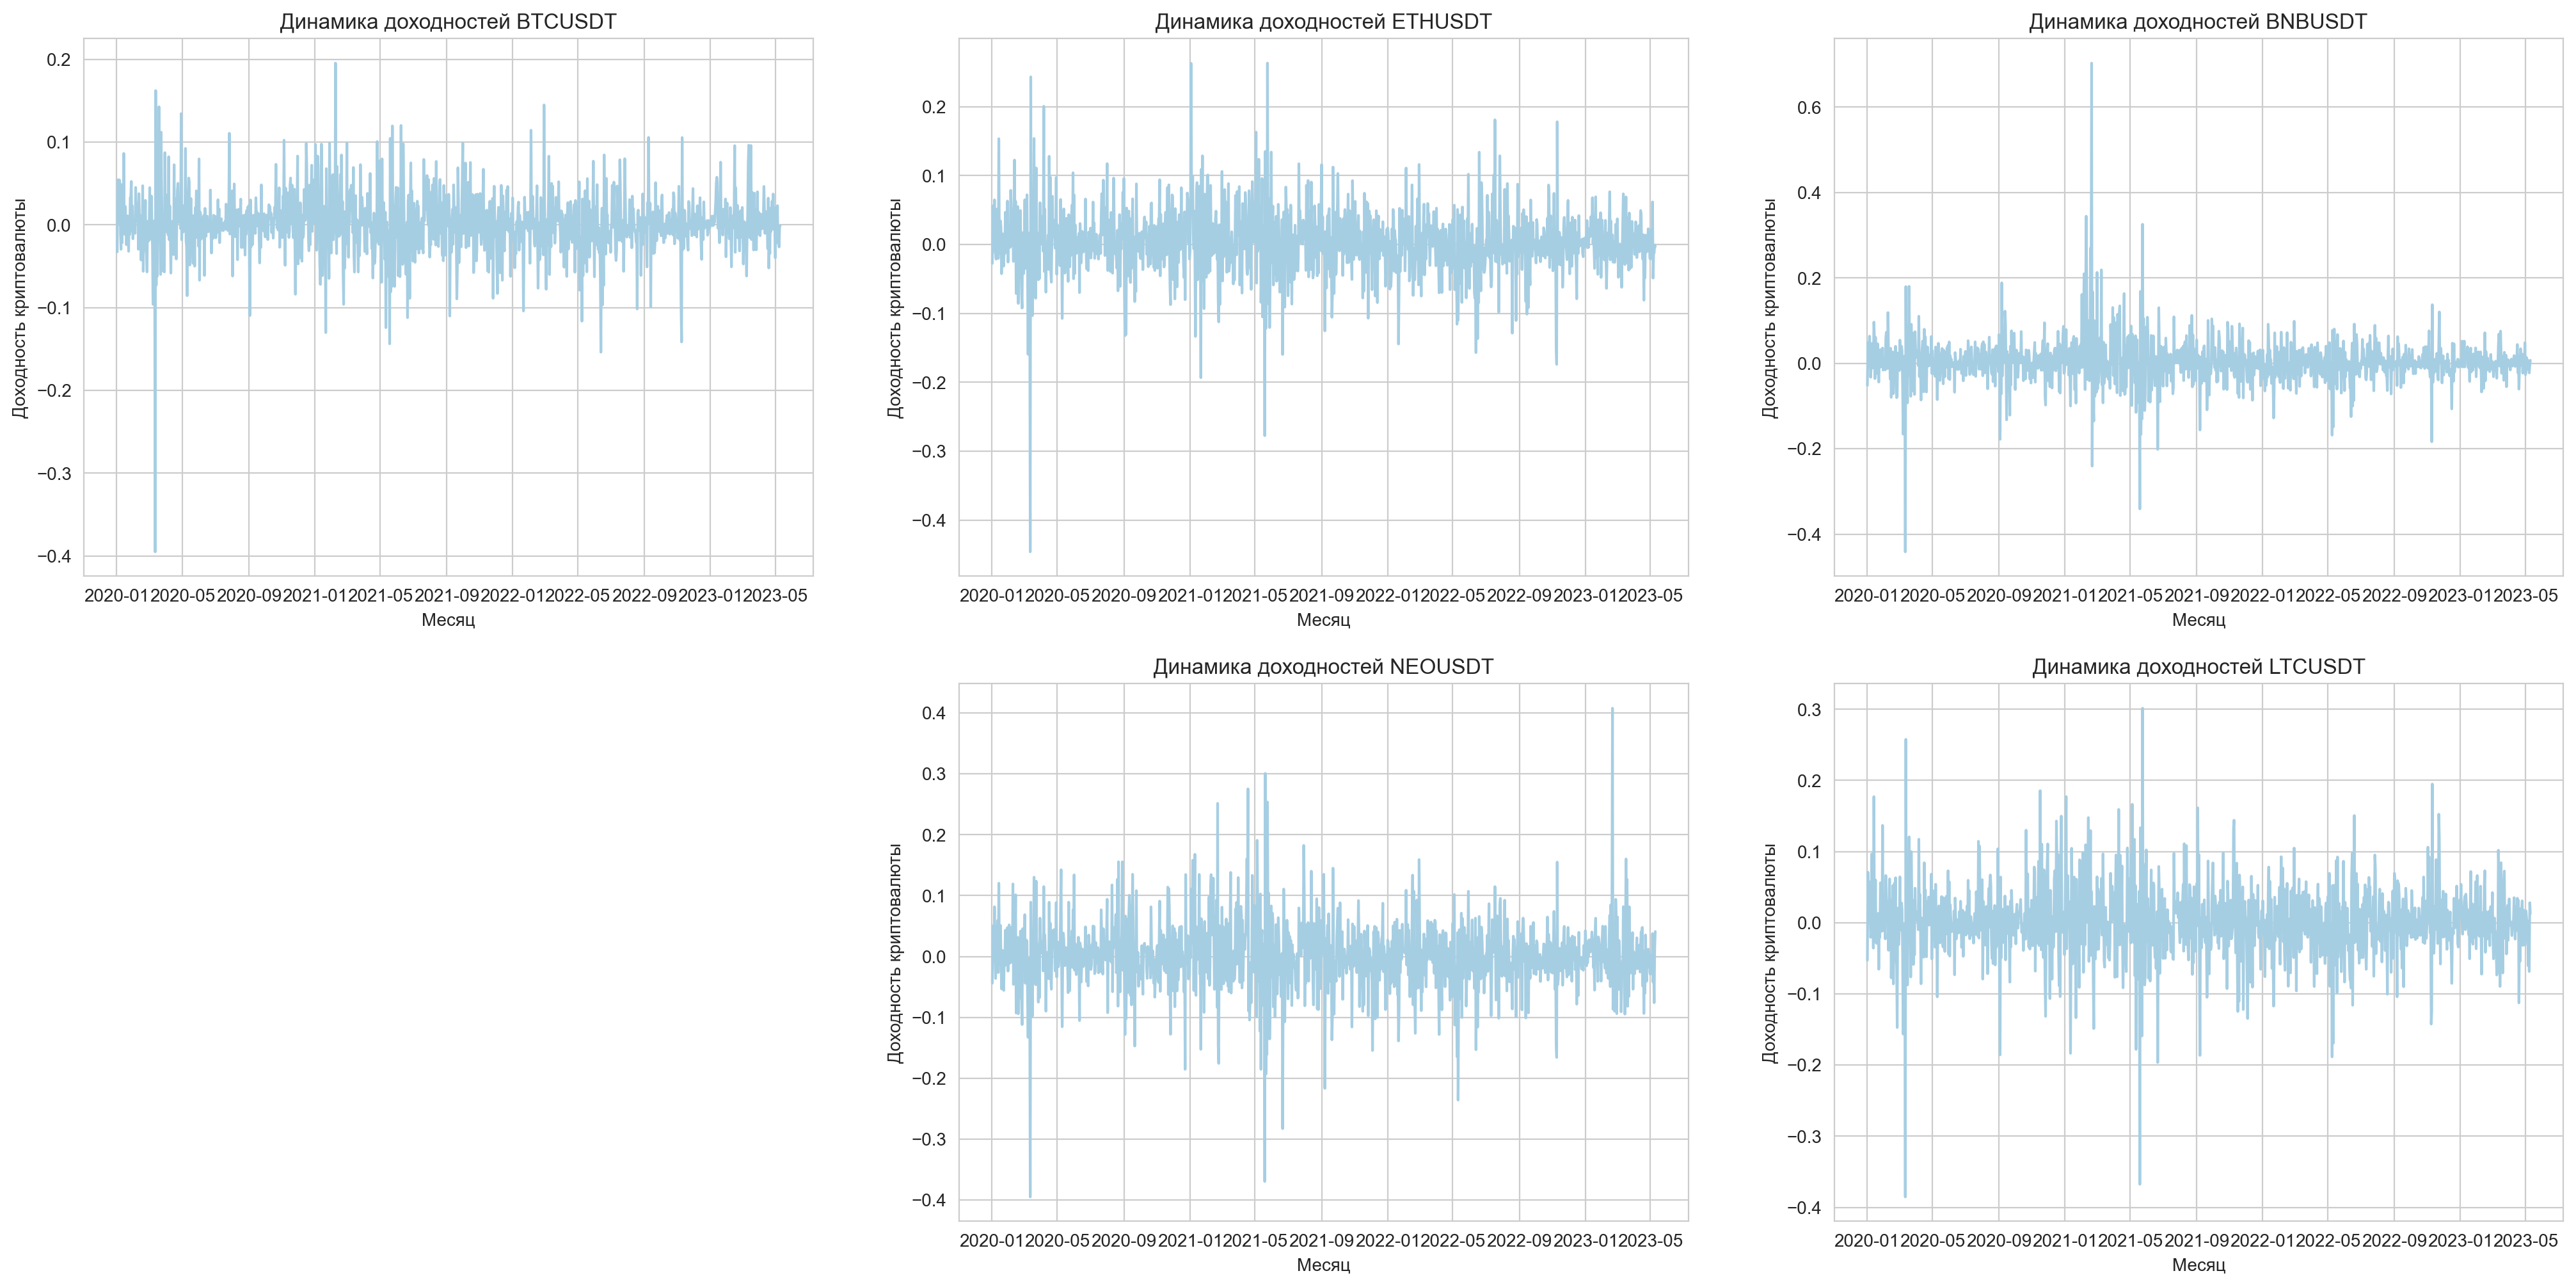

In [124]:
# Динамика доходностей
fig, ax = plt.subplots(2, 3, figsize=(25, 12))
for i in axs:
    ind = axs.index(i)
    ax[i].plot(df_r[tickers[ind]])
    ax[i].set_title(f'Динамика доходностей {tickers[ind]}')
    ax[i].set_xlabel(f'Месяц')
    ax[i].set_ylabel(f'Доходность криптовалюты')
    
ax[(1, 0)].axis('off')
plt.show()

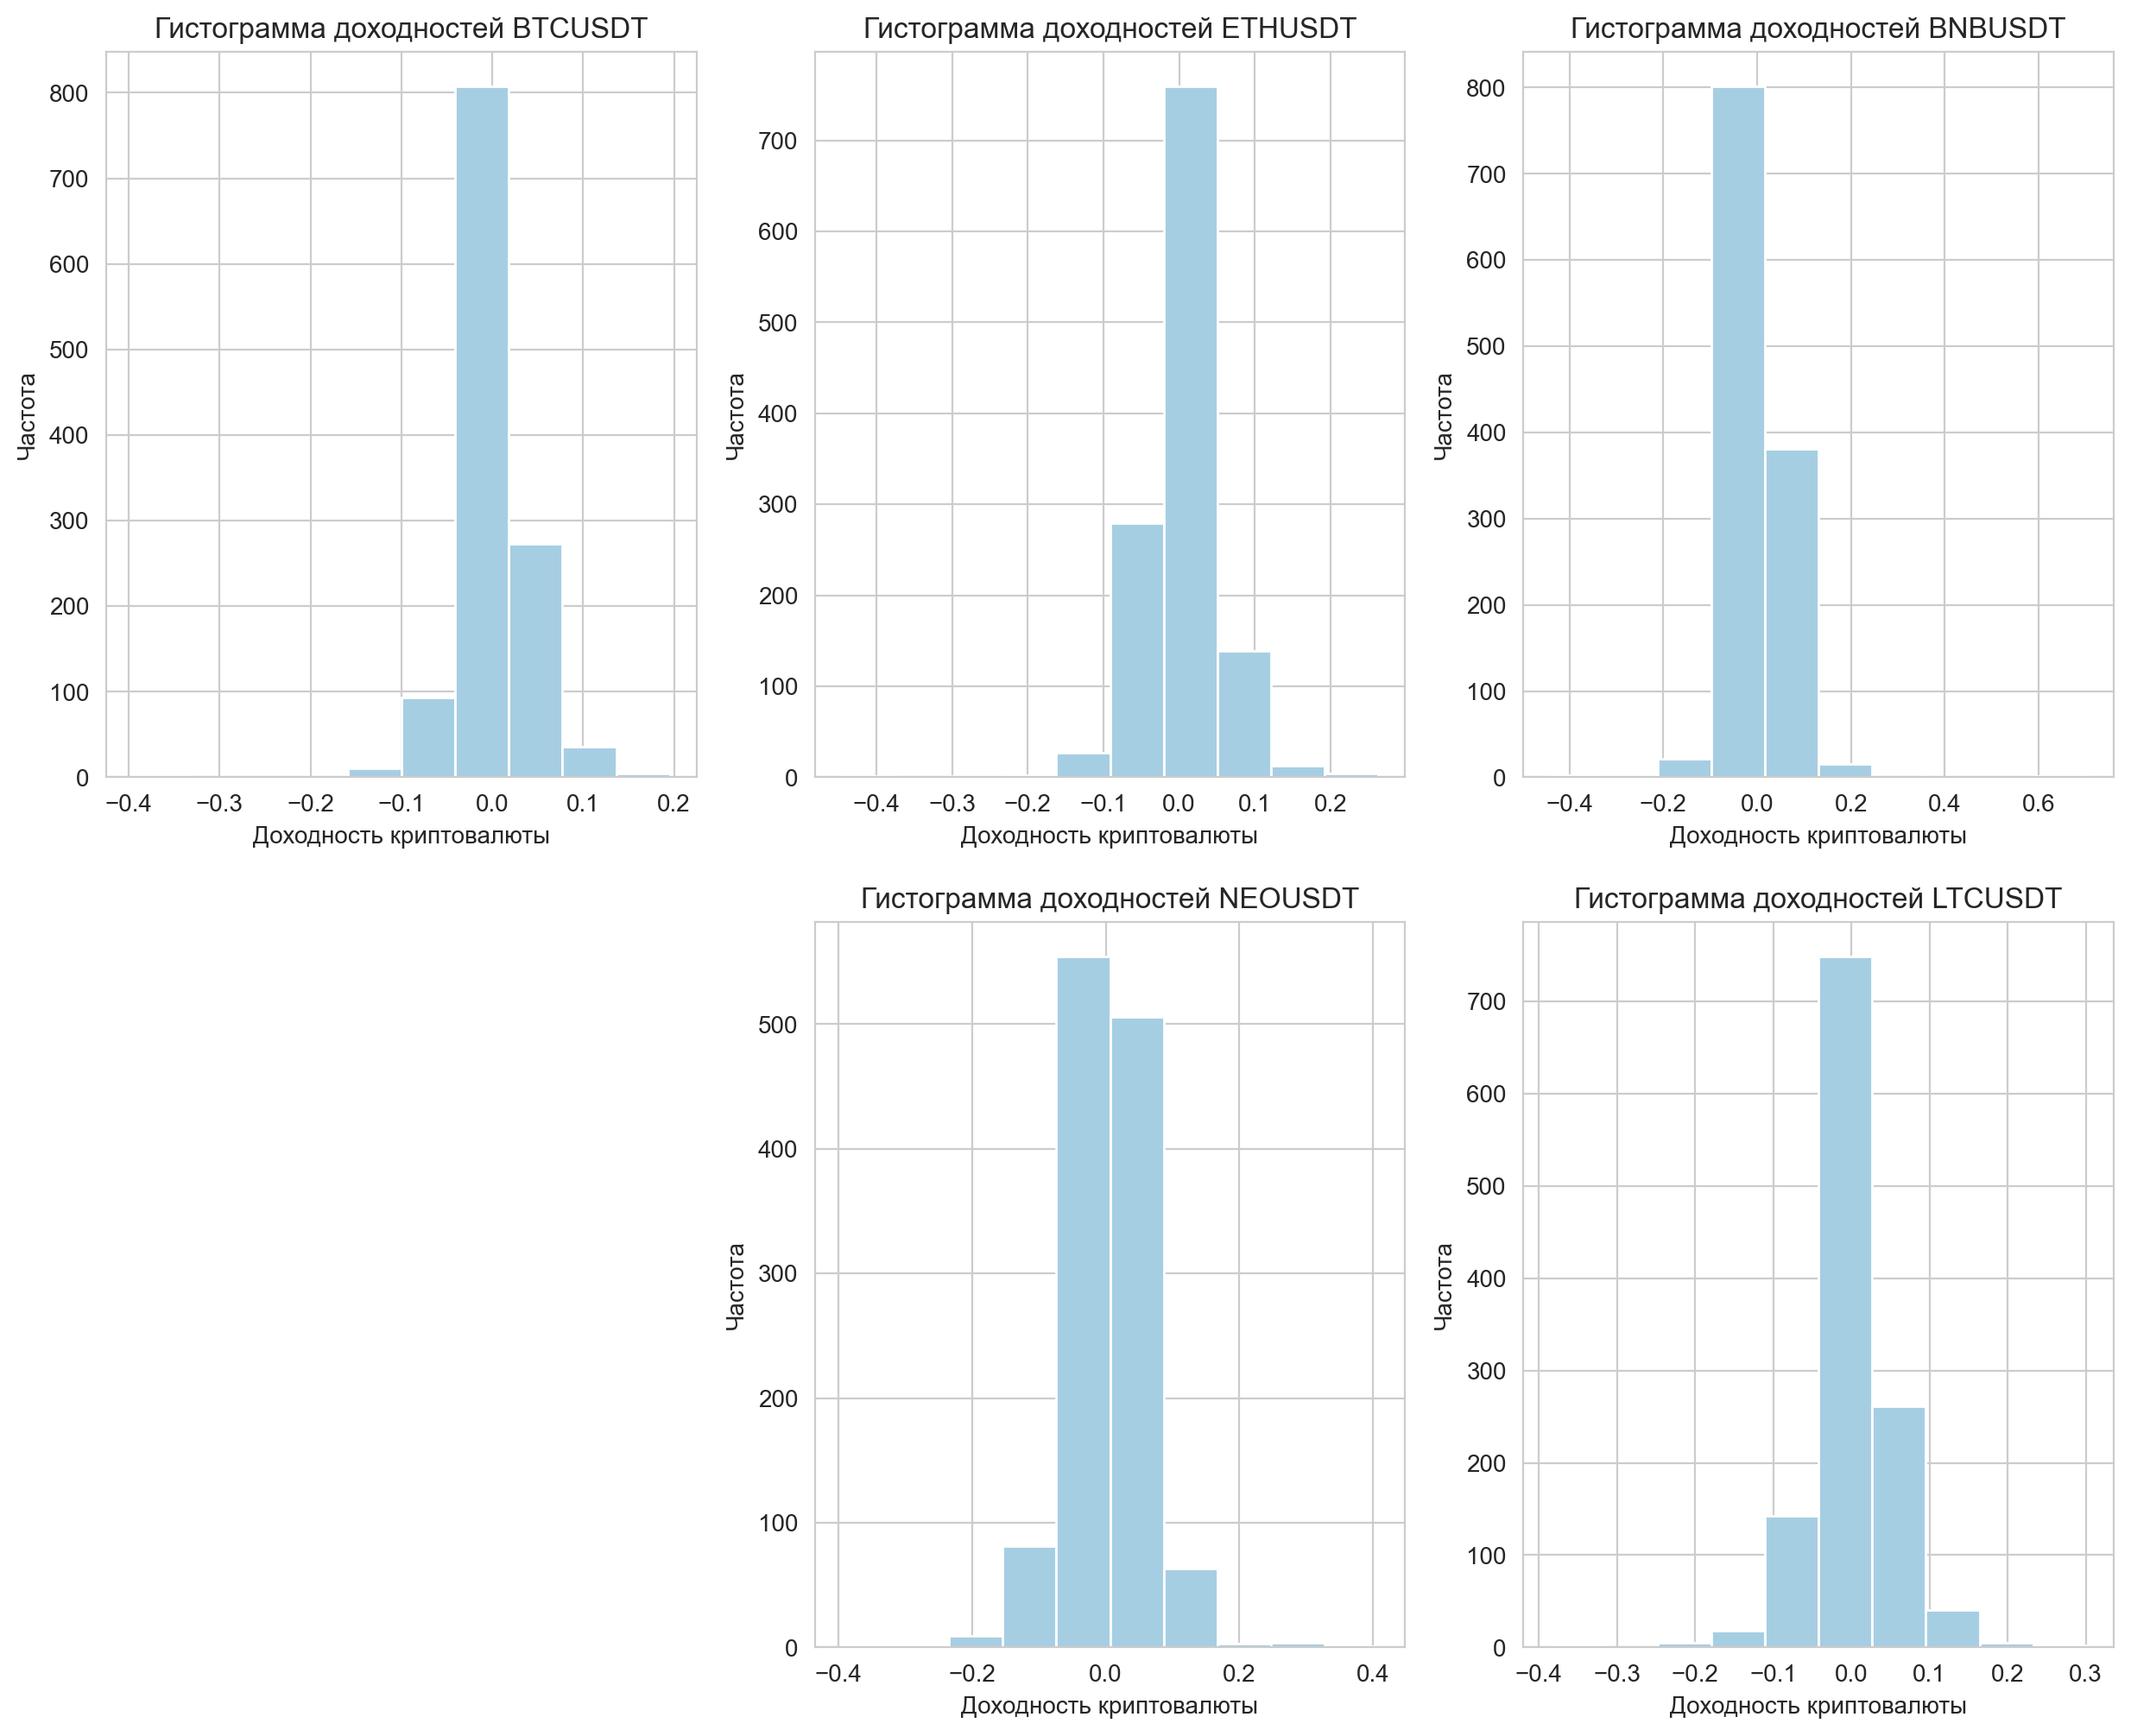

In [125]:
# Гистограммы
fig, ax = plt.subplots(2, 3, figsize=(15, 12))
for i in axs:
    ind = axs.index(i)
    ax[i].hist(df_r[tickers[ind]])
    ax[i].set_title(f'Гистограмма доходностей {tickers[ind]}')
    ax[i].set_xlabel(f'Доходность криптовалюты')
    ax[i].set_ylabel(f'Частота')
    
ax[(1, 0)].axis('off')
plt.show()

Доходность рассмотренных криптовалют похожа на нормальное распределение.

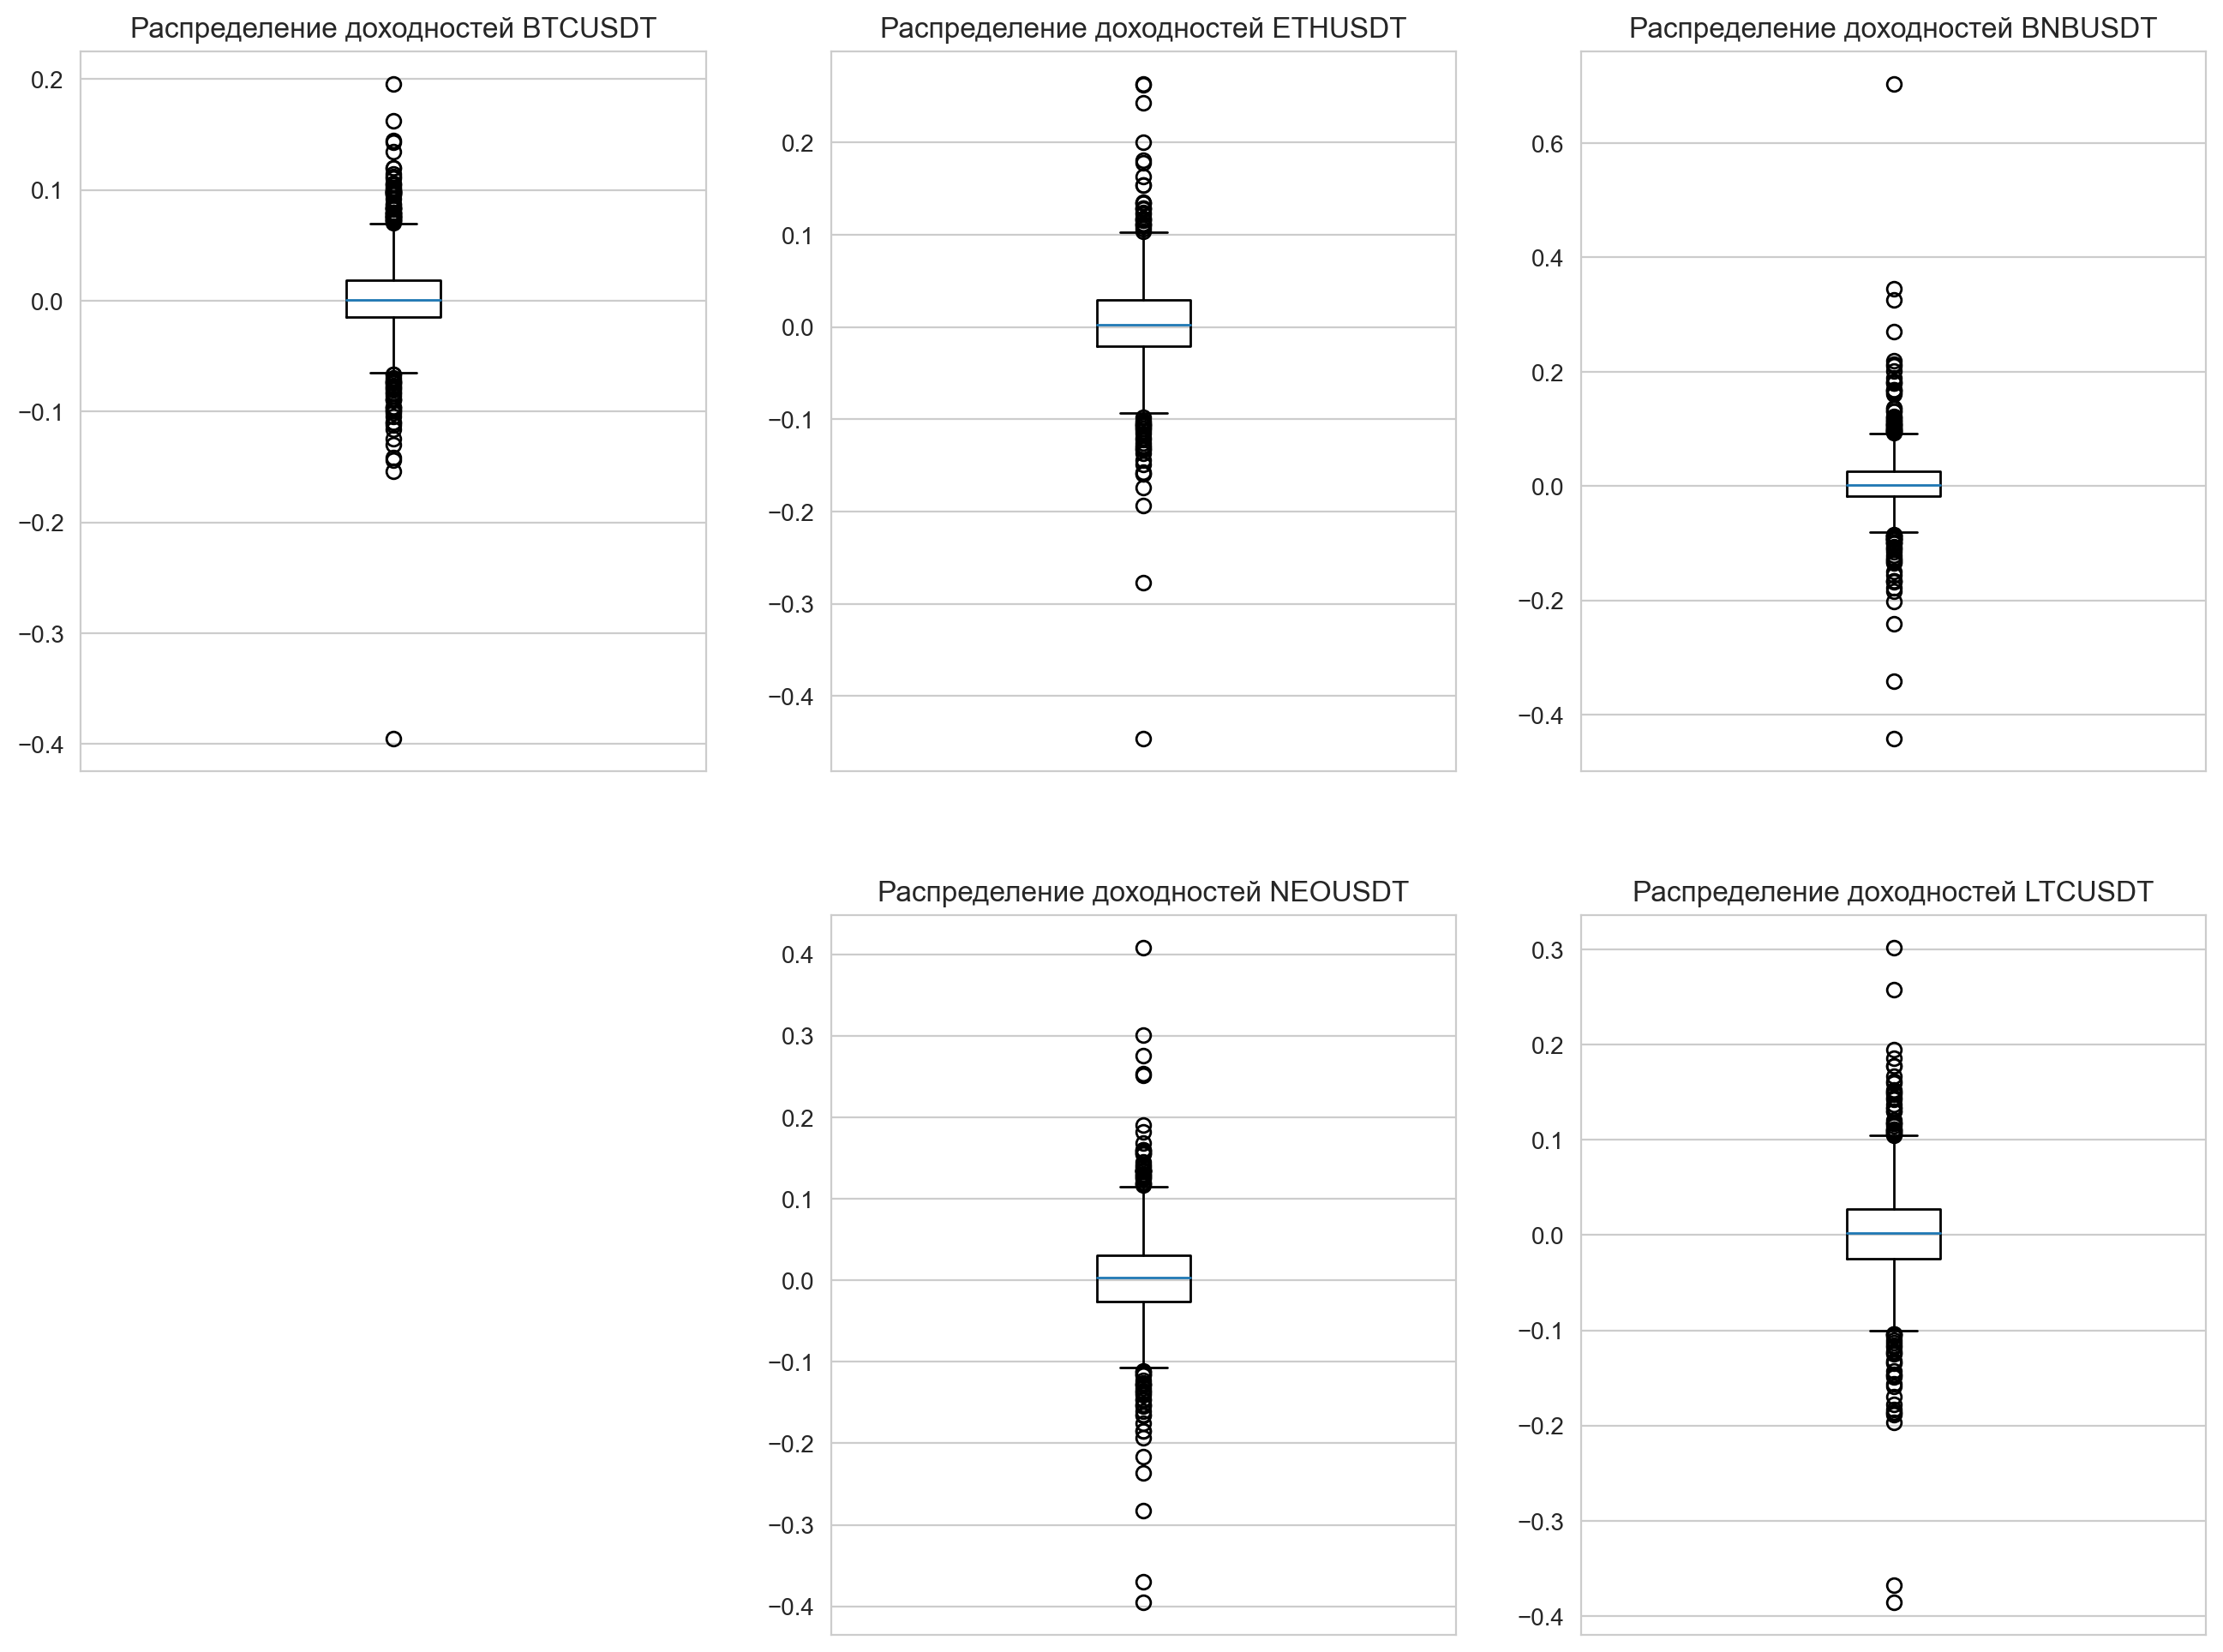

In [126]:
# Ящики с усами
fig, ax = plt.subplots(2, 3, figsize=(16, 12))
for i in axs:
    ind = axs.index(i)
    ax[i].boxplot(df_r[tickers[ind]].dropna())
    ax[i].set_title(f'Распределение доходностей {tickers[ind]}')
    ax[i].get_xaxis().set_visible(False)
    
ax[(1, 0)].axis('off')
plt.show()

По ящику с усами для рассмотренных криптовалют видно, что в данных имеются выбросы, однако для боллее корректного анализа доходностей их исключать не нужно.

Чтобы посмотреть, насколько сильно распределение отличается от нормального, можно вспользоваться диаграммой квантиль-квантиль. Построим ее на примере для биткоина. На картинке ниже видно, что центр распределения похож на нормальное, а квантили на хвостах отличаются от нормальных в более тяжёлую сторону:

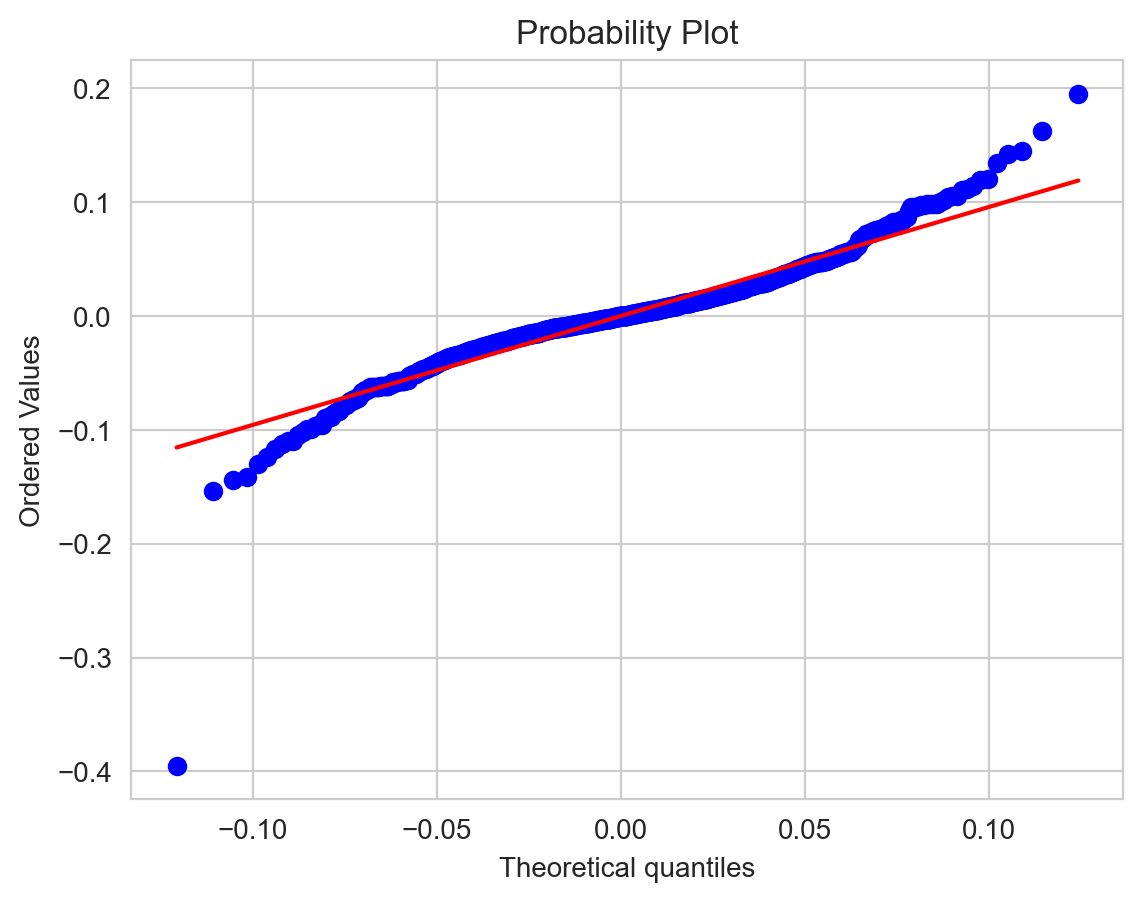

In [127]:
ax = plt.subplot(111)
x = df_r['BTCUSDT'].values
sts.probplot(x, dist='norm', sparams=(x.mean(), x.std()), plot=ax);

<font color='green' size=4>****Накопленная доходность****</font>

При анализе финансовых активов также используют такой показатель, как накопленная доходность. Рассчитаем и визуализируем ее для наших криптовалют. 

In [128]:
df_r_nakop = pd.DataFrame()

df_r_nakop = df_r
df_r_nakop = df_r_nakop.cumsum(axis=None)
df_r_nakop

BTCUSDT   ETHUSDT   BNBUSDT   NEOUSDT   LTCUSDT  QTUMUSDT  \
Date                                                                     
2020-01-02 -0.032654 -0.027376 -0.051602 -0.043842 -0.052619 -0.043668   
2020-01-03  0.021791  0.028917 -0.002649  0.006501  0.018393  0.018954   
2020-01-04  0.023037  0.027801  0.009206  0.027766  0.031417  0.026935   
2020-01-05  0.023667  0.036519  0.026876  0.021486  0.043572  0.020235   
2020-01-06  0.077923  0.101379  0.090484  0.103193  0.101309  0.091357   
...              ...       ...       ...       ...       ...       ...   
2023-05-06  2.282918  4.230013  4.979430  2.288472  2.423518  3.241932   
2023-05-07  2.268425  4.216339  4.976634  2.275485  2.425439  3.220326   
2023-05-08  2.241646  4.204128  4.954204  2.199574  2.356991  3.168062   
2023-05-09  2.240182  4.203565  4.948787  2.213812  2.385172  3.181654   
2023-05-10  2.239113  4.200489  4.955836  2.254849  2.398064  3.193915   

             ADAUSDT   XRPUSDT   EOSUSDT  IOTAUSDT  ...   NKNUSDT   STXUSDT  \
Date                                                ...                       
2020-01-02 -0.023596 -0.028749 -0.055532 -0.013699  ...  0.019900 -0.093023   
2020-01-03  0.021678  0.002611  0.017781  0.036806  ...  0.006350 -0.039512   
2020-01-04  0.026653  0.000904  0.021002  0.078874  ... -0.012880 -0.040570   
2020-01-05  0.034224  0.008571  0.035503  0.069647  ...  0.033618 -0.065993   
2020-01-06  0.112837  0.155438  0.096586  0.132510  ...  0.017023 -0.021428   
...              ...       ...       ...       ...  ...       ...       ...   
2023-05-06  4.454197  3.148163  1.229790  2.376917  ...  6.291018  5.509932   
2023-05-07  4.447068  3.128085  1.215548  2.375355  ...  6.282567  5.554789   
2023-05-08  4.418610  3.081982  1.150532  2.315397  ...  6.155674  5.567915   
2023-05-09  4.413135  3.083383  1.164881  2.311514  ...  6.189296  5.501518   
2023-05-10  4.429650  3.086648  1.158352  2.314298  ...  6.209233  5.460466   

            KAVAUSDT  ARPAUSDT  IOTXUSDT   RLCUSDT  CTXCUSDT   BCHUSDT  \
Date                                                                     
2020-01-02 -0.104893 -0.074248 -0.028638 -0.098875 -0.040625 -0.043778   
2020-01-03 -0.098109 -0.051913 -0.013152 -0.025283 -0.009680  0.094029   
2020-01-04 -0.082486 -0.037017  0.025851 -0.040131  0.093005  0.103201   
2020-01-05 -0.091235 -0.050716  0.032060 -0.022798  0.050025  0.095717   
2020-01-06 -0.069993 -0.059645  0.088722 -0.047243  0.057510  0.192040   
...              ...       ...       ...       ...       ...       ...   
2023-05-06  2.729834  5.097200  6.213899  5.477371  6.186730  1.374650   
2023-05-07  2.732597  5.176300  6.202868  5.452440  6.181212  1.366957   
2023-05-08  2.758768  5.094567  6.157823  5.404145  6.094641  1.323891   
2023-05-09  2.835278  5.096862  6.159171  5.322951  6.111045  1.423801   
2023-05-10  2.941263  5.229941  6.181154  5.347642  6.099090  1.371428   

            TROYUSDT  VITEUSDT  
Date                            
2020-01-02 -0.044787 -0.056159  
2020-01-03 -0.051428  0.021576  
2020-01-04 -0.056263  0.063428  
2020-01-05 -0.030111  0.011291  
2020-01-06 -0.049020  0.042851  
...              ...       ...  
2023-05-06  2.749509  4.286102  
2023-05-07  2.734848  4.277572  
2023-05-08  2.644191  4.145993  
2023-05-09  2.643810  4.162893  
2023-05-10  2.663985  4.195557  

[1225 rows x 68 columns]

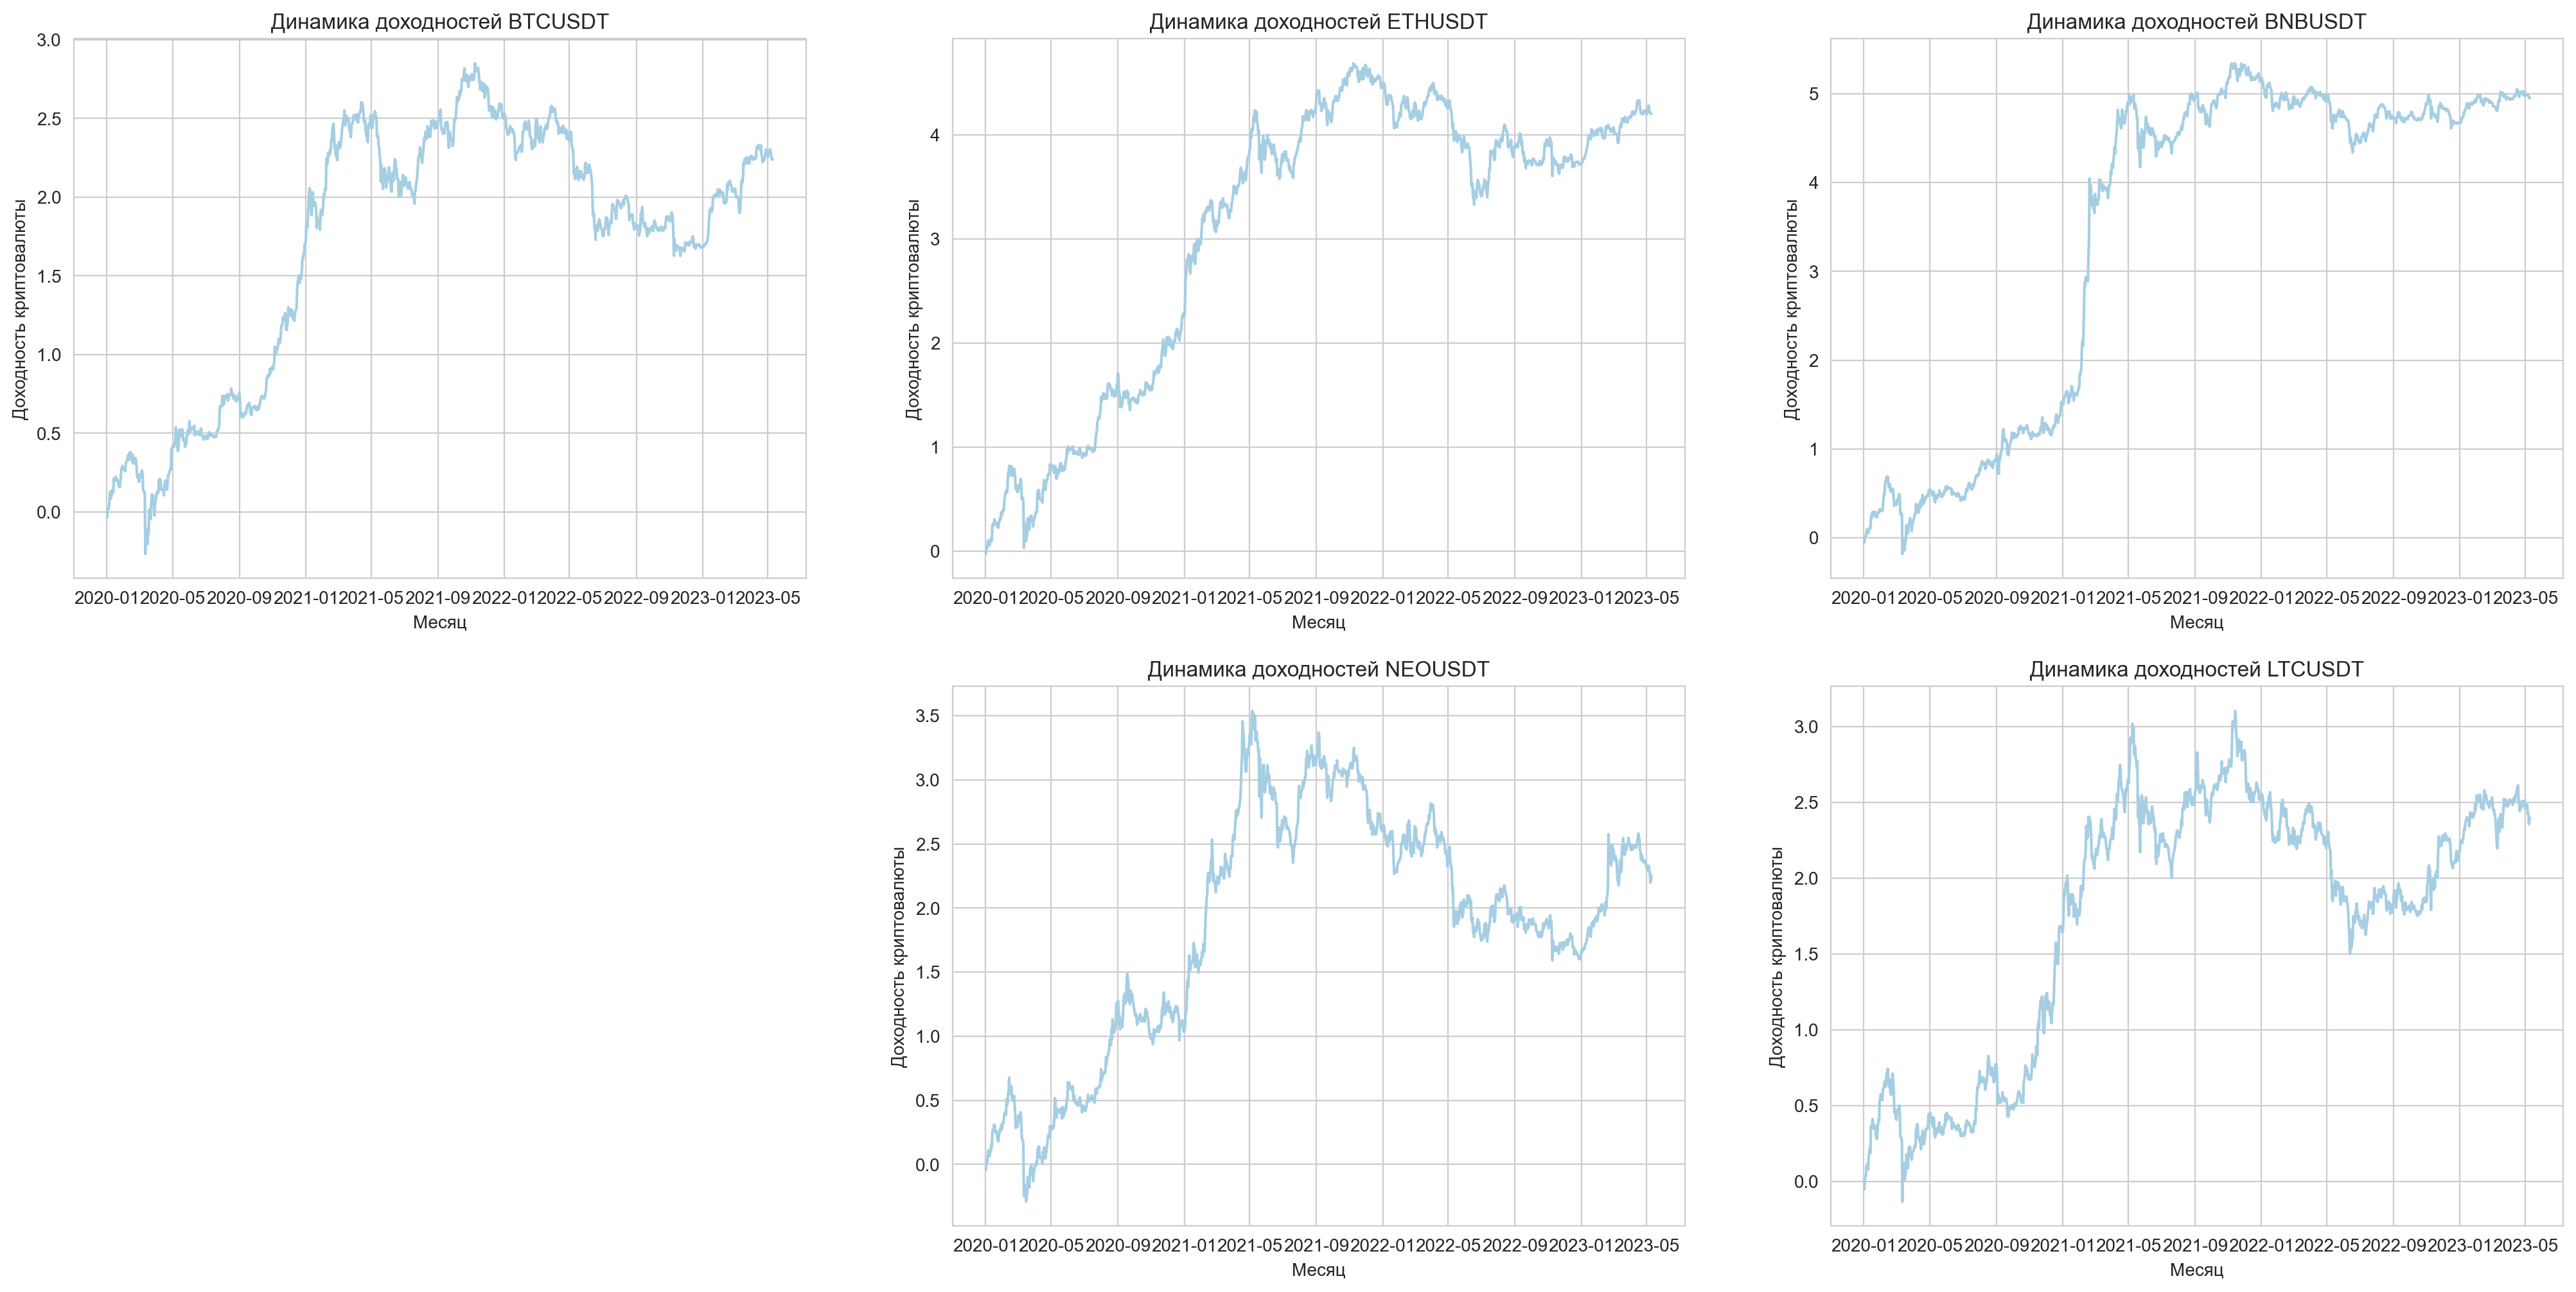

In [129]:
# Динамика накопленных доходностей
fig, ax = plt.subplots(2, 3, figsize=(25, 12))
for i in axs:
    ind = axs.index(i)
    ax[i].plot(df_r_nakop[tickers[ind]])
    ax[i].set_title(f'Динамика доходностей {tickers[ind]}')
    ax[i].set_xlabel(f'Месяц')
    ax[i].set_ylabel(f'Доходность криптовалюты')
    
ax[(1, 0)].axis('off')
plt.show()

По графикам видно, что в целом с 2020 года накопленная доходность криптовалют росла и на 10.05.2023 она была положительна.  Наибольшей накопленной доходностью по состоянию на 10.05.2023 обладал BNB.

<font color=blue size=6>Волатильность</font>
    
Ключевым способом измерения риска финансовых инструментов считается волатильность. Один из стандартных способов ее измерить - использовать стандартное отклонение доходности актива. 

In [130]:
# Волатильность
STD = pd.DataFrame(df_r.std(axis=0), columns=['std'])

In [131]:
STD.sort_values(by='std')

std
BUSDUSDT  0.000702
BTCUSDT   0.037668
ETHUSDT   0.049682
XMRUSDT   0.050778
TRXUSDT   0.051406
...            ...
FTMUSDT   0.093555
MTLUSDT   0.096975
CTXCUSDT  0.102211
ONGUSDT   0.135240
DOGEUSDT  0.136528

[68 rows x 1 columns]

In [132]:
# 5 самых волатильных криптовалют
STD.sort_values(by='std').tail(5)

std
FTMUSDT   0.093555
MTLUSDT   0.096975
CTXCUSDT  0.102211
ONGUSDT   0.135240
DOGEUSDT  0.136528

In [133]:
# 5 самых неволатильных криптовалют
STD.sort_values(by='std').head(5)

std
BUSDUSDT  0.000702
BTCUSDT   0.037668
ETHUSDT   0.049682
XMRUSDT   0.050778
TRXUSDT   0.051406

Для большей наглядности посмотрим на соотношение доходность/волатильность.

In [134]:
R = pd.DataFrame(df_r.mean(axis=0), columns=['r'])

In [135]:
# Таблица волатильность/доходность
df_result = pd.concat([STD, R], axis=1)
df_result

std         r
BTCUSDT   0.037668  0.001828
ETHUSDT   0.049682  0.003429
BNBUSDT   0.055145  0.004046
NEOUSDT   0.058992  0.001841
LTCUSDT   0.052521  0.001958
...            ...       ...
RLCUSDT   0.083053  0.004365
CTXCUSDT  0.102211  0.004979
BCHUSDT   0.056124  0.001120
TROYUSDT  0.075869  0.002175
VITEUSDT  0.080412  0.003425

[68 rows x 2 columns]

Построим для анализируемых криптовалют диаграмму рассеивания, отображающую соотношение доходности и волатильности для каждой из них.

In [136]:
df_plotly = df_result.copy()

In [137]:
fig = px.scatter(data_frame = df_plotly,
                 x = 'r',
                 y = 'std',
                 labels = {'r' : 'Доходность', 'std': 'Волатильность'},
                 title = 'Соотношение доходность - волатильность',
                 symbol = df_result.index)
fig.show()

По графику видно, что 
- доходность колеблется 0 до 0.007, при этом основное сосредоточение точек в пределах от 0.002 до 0.005
- волатильность колеблется от 0 до 0.14, при этом основное сосредоточение точек в пределах от 0.05 до 0.09

<font color='blue' size=6>Value-at-Risk</font>

VaR (Value-at-Risk уровне 5%) – это квантиль доходности уровня 5%. То есть это такое значение доходности, что в 95% случаев дела будут идти лучше.

In [138]:
# VaR
VaR = pd.DataFrame(df_r.quantile(.05, axis=0))
VaR.columns = ['VaR']

In [139]:
VaR.sort_values(by='VaR')

VaR
FTMUSDT  -0.119858
PERLUSDT -0.116378
CTXCUSDT -0.112908
CELRUSDT -0.112301
FETUSDT  -0.110921
...            ...
TRXUSDT  -0.071974
ETHUSDT  -0.070997
BNBUSDT  -0.068673
BTCUSDT  -0.057023
BUSDUSDT -0.000799

[68 rows x 1 columns]

In [140]:
# 5 самых безрисковых криптовалют с точки зрения VaR
VaR.sort_values(by='VaR').head(5)

VaR
FTMUSDT  -0.119858
PERLUSDT -0.116378
CTXCUSDT -0.112908
CELRUSDT -0.112301
FETUSDT  -0.110921

In [141]:
# 5 самых рискованных криптовалют с точки зрения VaR
VaR.sort_values(by='VaR').tail(5)

VaR
TRXUSDT  -0.071974
ETHUSDT  -0.070997
BNBUSDT  -0.068673
BTCUSDT  -0.057023
BUSDUSDT -0.000799

Построим для анализируемых криптовалют диаграмму рассеивания, отображающую соотношение доходности и VaR для каждой из них. Для построения диаграммы домножим VaR на -1, чтобы интерпретировать его как потери.

In [142]:
df_result = df_result.join(VaR)
df_result['VaR'] = df_result['VaR'] * (-1)
df_result.head()

std         r       VaR
BTCUSDT  0.037668  0.001828  0.057023
ETHUSDT  0.049682  0.003429  0.070997
BNBUSDT  0.055145  0.004046  0.068673
NEOUSDT  0.058992  0.001841  0.089706
LTCUSDT  0.052521  0.001958  0.077756

In [143]:
fig = px.scatter(data_frame = df_result,
                 x = 'r',
                 y = 'VaR',
                 labels = {'r' : 'Доходность'},
                 title = 'Соотношение доходность - VaR',
                 symbol = df_result.index)
fig.show()

По графику видно, что
- доходность колеблется 0 до 0.007, при этом основное сосредоточение точек в пределах от 0.002 до 0.005
- VaR колеблется от -0.12 до 0, при этом основное сосредоточение точек в пределах от -0.12 до -0.07

<font color='blue' size=6>Коэффициент Шарпа</font>

$$
Sharp Ratio = \frac{R_p - R_f}{σ_p}
$$
- $R_p$ - доходность анализируемого актива

- $R_f$ - доходность безрискового актива

- $σ_p$ - стандартное отклонение доходности анализируемого актива

Вычисляя коэффициент Шарпа, мы сравниваем поведение актива с альтернативной безрисковой величиной. Поскольку все криптовалюты торгуются в долларах США, оптимально взять за подобную безрисковую величину доходность по государственным облигациям США - US TREASURY.

Доходность US TREASURY за период 01.01.2020 - 10.05.2023 взята с сайта американской биржи NASDAQ (https://data.nasdaq.com/data/USTREASURY/YIELD-treasury-yield-curve-rates).

Однако в отличии от криптовалютной биржи Binance, с которой взяты данные о котировках криптовалют, биржа NASDAQ, где торгуются ценные бумаги собирает статистику только в будние дни, так как по входным торги не идут. Поэтому далее в отношении доходностей и прочих показателей мы будем рассматривать только рабочие дни.

Поскольку ранее мы рассматривали ежедневную доходность криптовалют, для подсчета коэффициента шарпа мы будем рассматривать ежедневные колебания доходности, связанные с колебаниями стоимости treasury (купонную доходность здесь не учитываем), самых краткосрочных US TREASURY, то есть со сроком обращения 1 месяц (столбец '1 MO' в рассматриваемой таблице).

In [144]:
# Полная таблица ежедневной доходности безрискового актива
treasury = pd.read_csv('treasury.csv')
treasury

Date      1 MO      2 MO      3 MO      6 MO      1 YR      2 YR  \
0    2023-05-10 -0.010791 -0.032946 -0.009452 -0.009653 -0.022869 -0.027431   
1    2023-05-09  0.009074 -0.001934 -0.003766  0.007782  0.004175  0.002500   
2    2023-05-08 -0.014311 -0.011472  0.009506  0.001949  0.012685  0.020408   
3    2023-05-05 -0.029514 -0.001908  0.000000  0.017857  0.030501  0.045333   
4    2023-05-04  0.225532 -0.016886  0.000000 -0.007874 -0.023404 -0.035990   
..          ...       ...       ...       ...       ...       ...       ...   
835  2020-01-09  0.020000  0.013072  0.000000  0.000000 -0.006452  0.000000   
836  2020-01-08 -0.013158  0.000000  0.000000  0.000000  0.013072  0.025974   
837  2020-01-07 -0.012987 -0.006494 -0.012821  0.000000 -0.006494  0.000000   
838  2020-01-06  0.013158 -0.006452  0.026316  0.006452 -0.006452  0.006536   
839  2020-01-03 -0.006536  0.000000 -0.012987 -0.012739 -0.006410 -0.031646   

         3 YR      5 YR      7 YR     10 YR     20 YR     30 YR  
0   -0.032698 -0.039886 -0.031339 -0.028329 -0.015228 -0.012987  
1   -0.008108  0.005731  0.002857  0.002841  0.005102  0.002604  
2    0.019284  0.023460  0.026393  0.023256  0.018182  0.021277  
3    0.046110  0.036474  0.027108  0.020772  0.013158  0.008043  
4   -0.030726 -0.023739 -0.014837 -0.002959  0.002639  0.008108  
..        ...       ...       ...       ...       ...       ...  
835 -0.012422 -0.011976 -0.005618 -0.010695 -0.018100  0.012766  
836  0.038710  0.030864  0.022989  0.021858  0.023148  0.017316  
837 -0.006410  0.006211  0.011628  0.011050  0.014085  0.013158  
838  0.012987  0.012579  0.005848  0.005556  0.009479  0.008850  
839 -0.031447 -0.047904 -0.044693 -0.042553 -0.036530 -0.030043  

[840 rows x 13 columns]

In [145]:
# Для анализа берем месячные US Treasuries
b = treasury[['Date', '1 MO']]
bond = pd.DataFrame()
bond = b.copy()

In [146]:
# Трансформировали даты в тип datetime
bond['Date'] = pd.to_datetime(bond['Date'], format = '%Y-%m-%d')
bond = bond.sort_values(by='Date')
bond

Date      1 MO
839 2020-01-03 -0.006536
838 2020-01-06  0.013158
837 2020-01-07 -0.012987
836 2020-01-08 -0.013158
835 2020-01-09  0.020000
..         ...       ...
4   2023-05-04  0.225532
3   2023-05-05 -0.029514
2   2023-05-08 -0.014311
1   2023-05-09  0.009074
0   2023-05-10 -0.010791

[840 rows x 2 columns]

In [147]:
bond_col = bond['Date'].values

In [148]:
# Доходность криптовалют в рабочие дни
dom_0 = df_r.copy()
dohod = dom_0.loc[bond_col]
dohod

BTCUSDT   ETHUSDT   BNBUSDT   NEOUSDT   LTCUSDT  QTUMUSDT  \
Date                                                                     
2020-01-03  0.054445  0.056294  0.048953  0.050343  0.071012  0.062622   
2020-01-06  0.054255  0.064859  0.063608  0.081707  0.057737  0.071122   
2020-01-07  0.049920 -0.009365  0.005051  0.004510  0.010917 -0.006869   
2020-01-08 -0.010963 -0.014566 -0.032564 -0.036017 -0.020518 -0.029971   
2020-01-09 -0.029571 -0.021177 -0.009330 -0.006456 -0.013451 -0.029115   
...              ...       ...       ...       ...       ...       ...   
2023-05-04 -0.006477 -0.014723 -0.006444 -0.023278 -0.005626 -0.008812   
2023-05-05  0.023145  0.061921  0.008338  0.037736  0.002602  0.018137   
2023-05-08 -0.026778 -0.012211 -0.022430 -0.075911 -0.068449 -0.052264   
2023-05-09 -0.001464 -0.000563 -0.005417  0.014239  0.028182  0.013592   
2023-05-10 -0.001068 -0.003076  0.007049  0.041037  0.012891  0.012261   

             ADAUSDT   XRPUSDT   EOSUSDT  IOTAUSDT  ...   NKNUSDT   STXUSDT  \
Date                                                ...                       
2020-01-03  0.045274  0.031360  0.073314  0.050505  ... -0.013550  0.053512   
2020-01-06  0.078613  0.146867  0.061083  0.062864  ... -0.016595  0.044565   
2020-01-07 -0.008574 -0.043702 -0.001649  0.016977  ... -0.022863  0.006243   
2020-01-08 -0.018649 -0.027420 -0.024878 -0.024771  ... -0.038440 -0.054809   
2020-01-09 -0.004131 -0.018169 -0.011495 -0.022639  ... -0.025492 -0.002188   
...              ...       ...       ...       ...  ...       ...       ...   
2023-05-04 -0.017005 -0.005181 -0.026163 -0.021042  ... -0.020110 -0.073931   
2023-05-05  0.017816  0.013672  0.011940  0.019447  ...  0.026119 -0.026164   
2023-05-08 -0.028457 -0.046102 -0.065015 -0.059958  ... -0.126894  0.013126   
2023-05-09 -0.005475  0.001401  0.014349 -0.003882  ...  0.033623 -0.066397   
2023-05-10  0.016515  0.003264 -0.006529  0.002784  ...  0.019937 -0.041052   

            KAVAUSDT  ARPAUSDT  IOTXUSDT   RLCUSDT  CTXCUSDT   BCHUSDT  \
Date                                                                     
2020-01-03  0.006783  0.022335  0.015485  0.073592  0.030945  0.137808   
2020-01-06  0.021242 -0.008929  0.056662 -0.024444  0.007485  0.096324   
2020-01-07  0.033431 -0.015015  0.019644  0.088838  0.049034 -0.007984   
2020-01-08 -0.016635 -0.038618 -0.051809  0.013482 -0.089235 -0.008708   
2020-01-09 -0.041028 -0.022199 -0.047776 -0.045183 -0.004666 -0.009076   
...              ...       ...       ...       ...       ...       ...   
2023-05-04  0.011524 -0.023616  0.005941 -0.077712 -0.031392 -0.022500   
2023-05-05  0.005063  0.008818 -0.040945 -0.011118  0.012023  0.023018   
2023-05-08  0.026171 -0.081733 -0.045045 -0.048295 -0.086570 -0.043066   
2023-05-09  0.076510  0.002295  0.001348 -0.081194  0.016403  0.099910   
2023-05-10  0.105985  0.133079  0.021983  0.024691 -0.011955 -0.052373   

            TROYUSDT  VITEUSDT  
Date                            
2020-01-03 -0.006641  0.077735  
2020-01-06 -0.018909  0.031560  
2020-01-07 -0.043714 -0.019231  
2020-01-08 -0.046004 -0.003565  
2020-01-09 -0.001174 -0.033095  
...              ...       ...  
2023-05-04 -0.017375 -0.021307  
2023-05-05  0.004257  0.001451  
2023-05-08 -0.090657 -0.131579  
2023-05-09 -0.000381  0.016900  
2023-05-10  0.020175  0.032665  

[840 rows x 68 columns]

In [149]:
# Стандартное отклонение доходности криптовалют в рабочие дни
otkl = pd.DataFrame(dohod.std(axis=0), columns=['std'])
otkl

std
BTCUSDT   0.041902
ETHUSDT   0.053399
BNBUSDT   0.061106
NEOUSDT   0.061393
LTCUSDT   0.056531
...            ...
RLCUSDT   0.083725
CTXCUSDT  0.109865
BCHUSDT   0.060998
TROYUSDT  0.081630
VITEUSDT  0.089436

[68 rows x 1 columns]

In [150]:
# Коэффициент Шарпа
sharp = pd.DataFrame()
sharp.index = dohod.index.values

for item in dohod.columns.values.tolist():
    sharp[item] = (dohod[item]-bond['1 MO'].values)/otkl.loc[item].values
sharp

BTCUSDT   ETHUSDT   BNBUSDT   NEOUSDT   LTCUSDT  QTUMUSDT  \
2020-01-03  1.455314  1.176601  0.908069  0.926469  1.371776  0.979950   
2020-01-06  0.980784  0.968203  0.825617  1.116569  0.788573  0.821332   
2020-01-07  1.501275  0.067824  0.295193  0.284994  0.422848  0.086691   
2020-01-08  0.052371 -0.026366 -0.317584 -0.372337 -0.130202 -0.238239   
2020-01-09 -1.183000 -0.771111 -0.479987 -0.430936 -0.591727 -0.695939   
...              ...       ...       ...       ...       ...       ...   
2023-05-04 -5.536881 -4.499224 -3.796265 -4.052752 -4.089039 -3.320577   
2023-05-05  1.256695  1.712286  0.619451  1.095399  0.568118  0.675191   
2023-05-08 -0.297525  0.039326 -0.132861 -1.003367 -0.957661 -0.537771   
2023-05-09 -0.251510 -0.180476 -0.237159  0.084120  0.337997  0.064016   
2023-05-10  0.232037  0.144483  0.291957  0.844203  0.418929  0.326638   

             ADAUSDT   XRPUSDT   EOSUSDT  IOTAUSDT  ...   NKNUSDT   STXUSDT  \
2020-01-03  0.839133  0.588776  1.230191  0.884908  ... -0.074596  0.704264   
2020-01-06  1.060135  2.077387  0.738355  0.771115  ... -0.316427  0.368358   
2020-01-07  0.071467 -0.477213  0.174681  0.464848  ... -0.105036  0.225543   
2020-01-08 -0.088931 -0.221581 -0.180563 -0.180163  ... -0.268878 -0.488498   
2020-01-09 -0.390838 -0.593013 -0.485225 -0.661489  ... -0.483815 -0.260232   
...              ...       ...       ...       ...  ...       ...       ...   
2023-05-04 -3.928236 -3.584508 -3.877702 -3.825237  ... -2.612414 -3.512231   
2023-05-05  0.766570  0.670962  0.638659  0.759562  ...  0.591664  0.039289   
2023-05-08 -0.229118 -0.493928 -0.781168 -0.708147  ... -1.197324  0.321790   
2023-05-09 -0.235648 -0.119221  0.081259 -0.201006  ...  0.261071 -0.885158   
2023-05-10  0.442270  0.218376  0.065670  0.210602  ...  0.326799 -0.354913   

            KAVAUSDT  ARPAUSDT  IOTXUSDT   RLCUSDT  CTXCUSDT   BCHUSDT  \
2020-01-03  0.177380  0.335592  0.219769  0.957032  0.341150  2.366381   
2020-01-06  0.107654 -0.256730  0.434163 -0.449115 -0.051635  1.363431   
2020-01-07  0.618181 -0.023573  0.325654  1.216181  0.564520  0.082026   
2020-01-08 -0.046300 -0.295944 -0.385735  0.318183 -0.692459  0.072948   
2020-01-09 -0.812745 -0.490512 -0.676391 -0.778539 -0.224508 -0.476677   
...              ...       ...       ...       ...       ...       ...   
2023-05-04 -2.850068 -2.896065 -2.191479 -3.621883 -2.338537 -4.066258   
2023-05-05  0.460484  0.445569 -0.114079  0.219721  0.378071  0.861211   
2023-05-08  0.539123 -0.783701 -0.306717 -0.405900 -0.657707 -0.471413   
2023-05-09  0.898079 -0.078799 -0.077111 -1.078148  0.066709  1.489167   
2023-05-10  1.555177  1.672328  0.327081  0.423799 -0.010588 -0.681696   

            TROYUSDT  VITEUSDT  
2020-01-03 -0.001285  0.942253  
2020-01-06 -0.392828  0.205757  
2020-01-07 -0.376413 -0.069813  
2020-01-08 -0.402377  0.107260  
2020-01-09 -0.259385 -0.593664  
...              ...       ...  
2023-05-04 -2.975691 -2.759957  
2023-05-05  0.413702  0.346229  
2023-05-08 -0.935268 -1.311195  
2023-05-09 -0.115826  0.087497  
2023-05-10  0.379350  0.485892  

[840 rows x 68 columns]

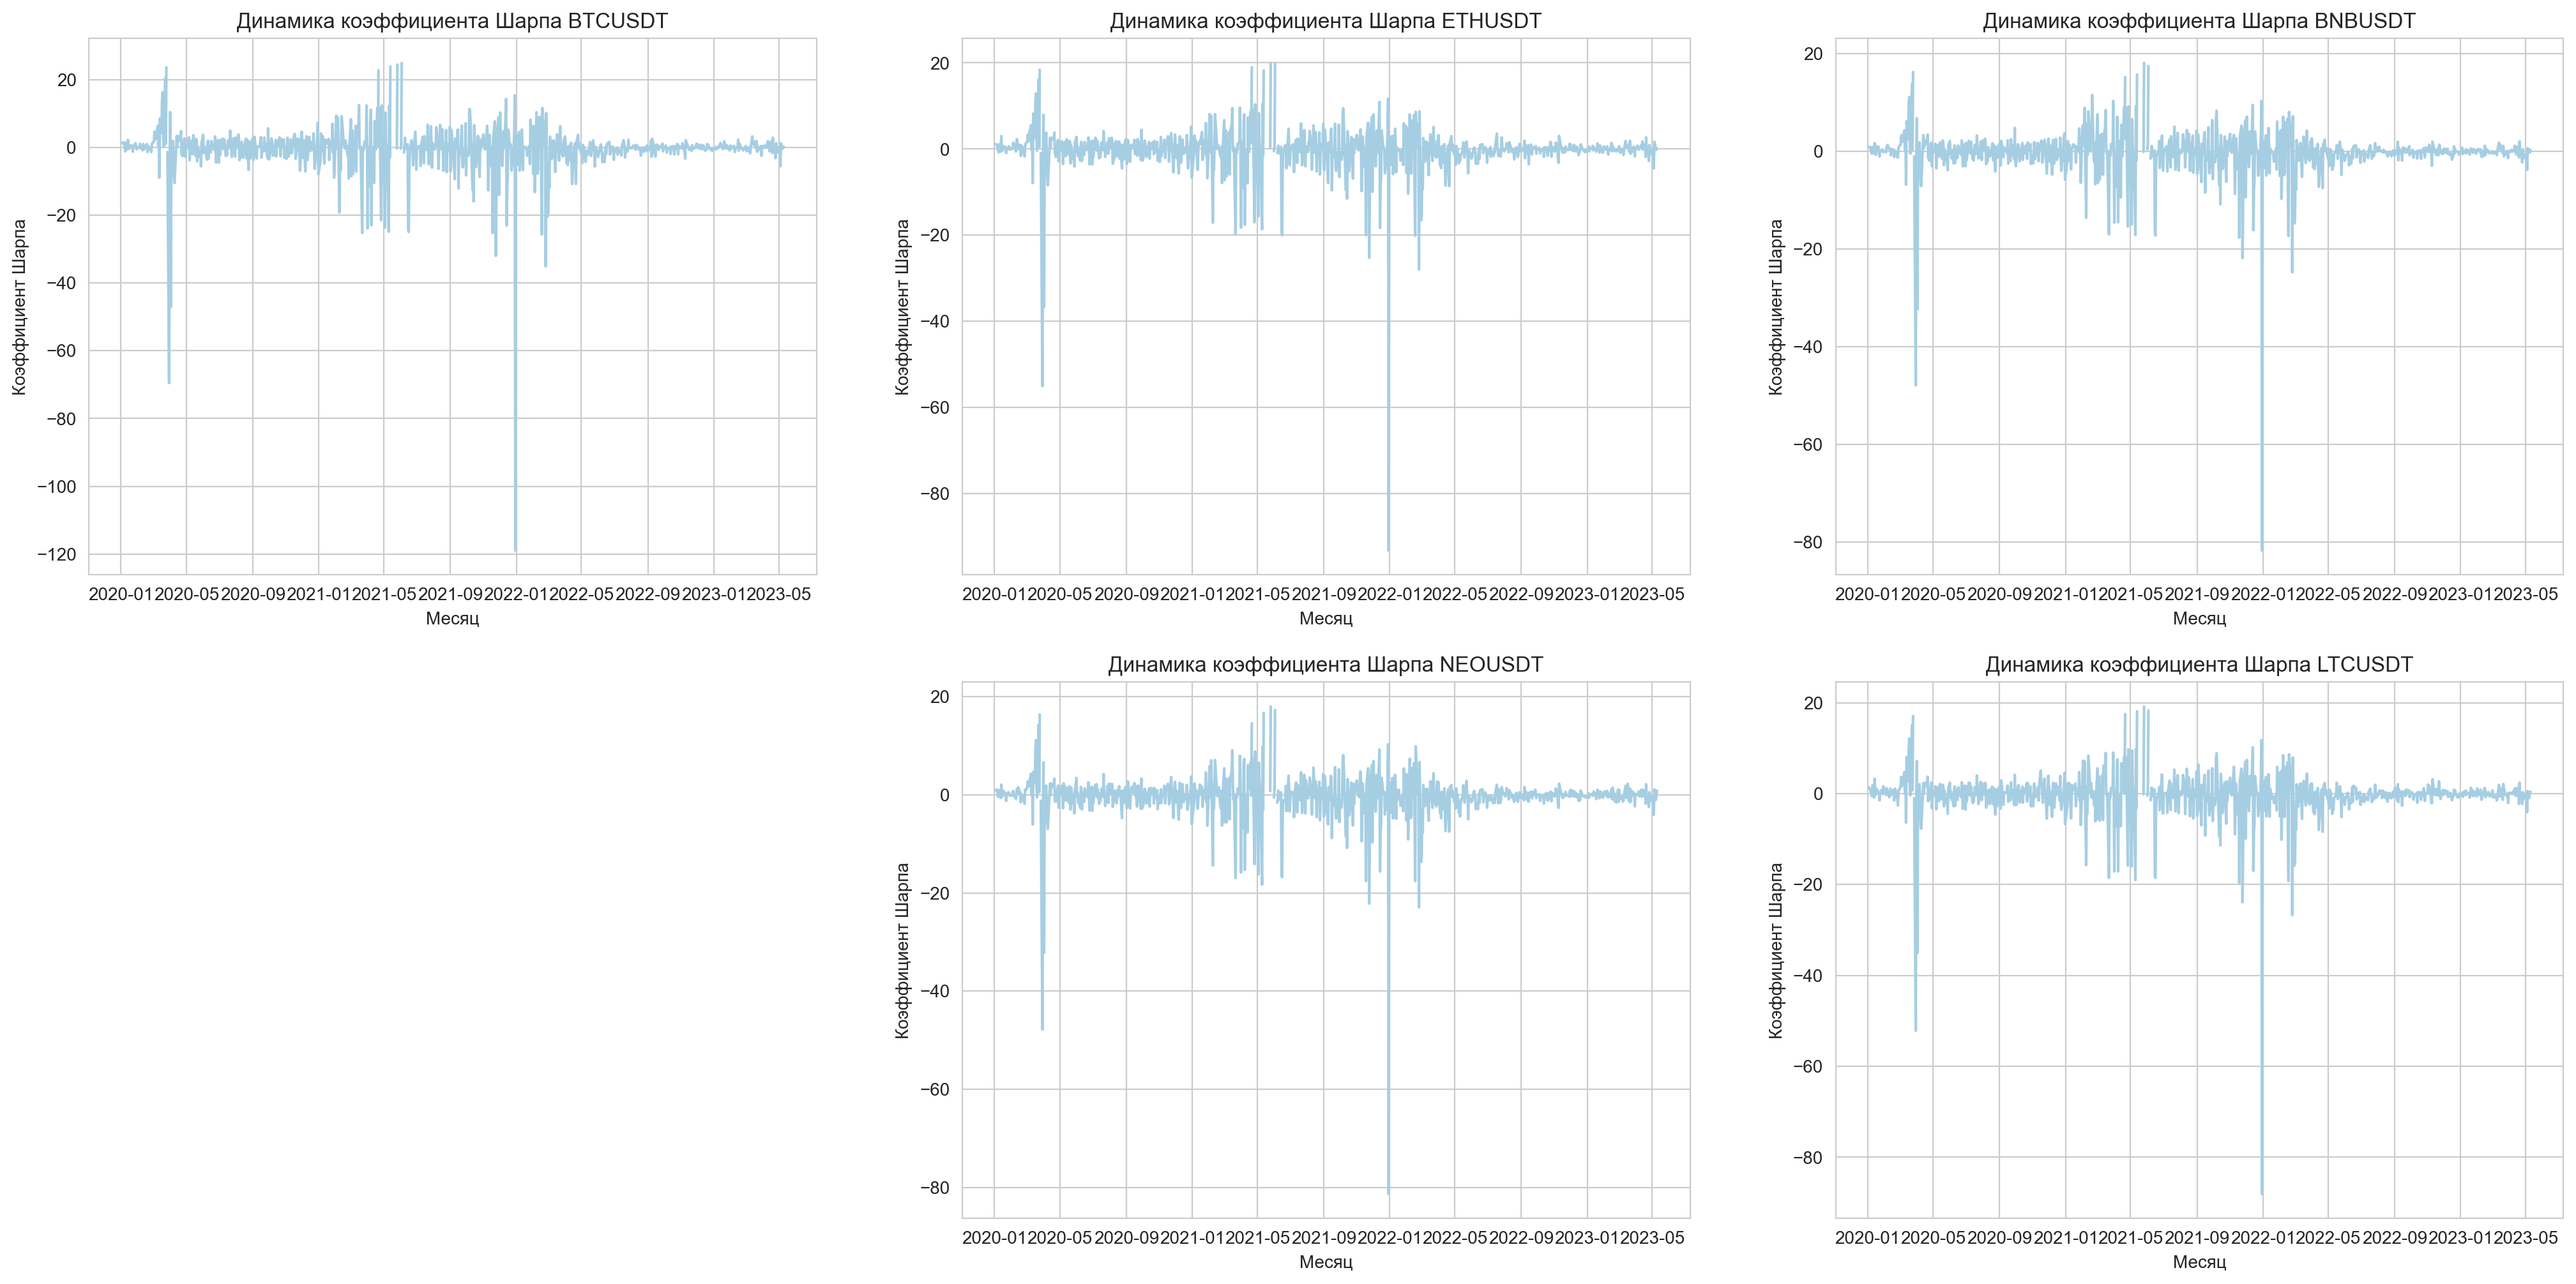

In [151]:
# Динамика коэффициента Шарпа
fig, ax = plt.subplots(2, 3, figsize=(25, 12))
for i in axs:
    ind = axs.index(i)
    ax[i].plot(sharp[tickers[ind]])
    ax[i].set_title(f'Динамика коэффициента Шарпа {tickers[ind]}')
    ax[i].set_xlabel(f'Месяц')
    ax[i].set_ylabel(f'Коэффициент Шарпа')
    
ax[(1, 0)].axis('off')
plt.show()

По графикам видно, что наибольшего значения коэффициент Шарпа достигал в мае 2021 года, а наименьшего - наче 2022 года, что логично объясняется нестабильной политической ситуацией в мире, что способствовало уменьшению привлекательности волатильных финансовых активов, к которым и относятся криптовалюты.




<font color='purple' size=10>Проверка гипотез</font>



Для проверки гипотез мы будем использовать 2 основные выборки: криптовалюты типа "coin" и типа "token". На основании проверенных гипотез можно сделать выводы об особенностях рыночного поведения различных типов криптовалют.

In [152]:
# Распечатали файл с типом каждой криптовалюты
with open('type.txt', 'r') as f:
    text = f.read()
data = text.split('\n')
len(data)

68

In [153]:
# Сделали таблицу вида "крипта/тип"
df_type = pd.DataFrame()

df_type['ticker'] = df.columns.values
df_type['type'] = data
df_type.set_index('ticker', inplace=True)
df_type

type
ticker         
BTCUSDT    coin
ETHUSDT    coin
BNBUSDT    coin
NEOUSDT    coin
LTCUSDT    coin
...         ...
RLCUSDT   token
CTXCUSDT   coin
BCHUSDT    coin
TROYUSDT  token
VITEUSDT   coin

[68 rows x 1 columns]

In [154]:
# Cделали 2 выборки
coin = df_result[df_type['type'] == 'coin']
token = df_result[df_type['type'] == 'token']

Чтобы проверить, влияет ли тип криптовалюты на ее рыночное поведение, проверим серию гипотез о равенстве математических ожиданий и дисперсий между типами криптовалют по рассчитанным для них показателям: доходности, волатильности и VaR. 

<font color='blue' size=4>**1.1. Гипотеза о равенстве матожиданий по доходности для двух групп криптовалют:**</font>

In [155]:
alpha = 0.05
z_crit = sts.norm.ppf(1 - alpha/2)

In [156]:
mean_coin = coin.r.mean()
mean_token = token.r.mean()

var_coin = coin.r.var(ddof=1)
var_token = token.r.var(ddof=1)

n_coin = coin.r.size
n_token = token.r.size

In [157]:
diff = mean_coin - mean_token
diff_std = np.sqrt(var_coin/n_coin + var_token/n_token)

z_obs = diff/diff_std    

print(f'Критическая статистика: {z_crit:.3}')
print(f'Расчетная статистика: {z_obs:.3}')

Критическая статистика: 1.96
Расчетная статистика: -0.657


-z_crit < Расчетная стат < z_crit => Ho не отвергается

<font color='blue' size=4>**1.2. Гипотеза о равенстве матожиданий по волатильности для двух групп криптовалют:**</font>

In [158]:
mean_coin = coin['std'].mean()
mean_token = token['std'].mean()

var_coin = coin['std'].var(ddof=1)
var_token = token['std'].var(ddof=1)

In [159]:
diff = mean_coin - mean_token
diff_std = np.sqrt(var_coin/n_coin + var_token/n_token)

z_obs = diff/diff_std    

print(f'Критическая статистика: {z_crit:.3}')
print(f'Расчетная статистика: {z_obs:.3}')

Критическая статистика: 1.96
Расчетная статистика: -1.35


-z_crit < Расчетная стат < z_crit => Ho не отвергается

<font color='blue' size=4>**1.3. Гипотеза о равенстве матожиданий по VaR для двух групп криптовалют:**</font>

In [160]:
mean_coin = coin.VaR.mean()
mean_token = token.VaR.mean()

var_coin = coin.VaR.var(ddof=1)
var_token = token.VaR.var(ddof=1)

In [161]:
diff = mean_coin - mean_token
diff_std = np.sqrt(var_coin/n_coin + var_token/n_token)

z_obs = diff/diff_std    

print(f'Критическая статистика: {z_crit:.3}')
print(f'Расчетная статистика: {z_obs:.3}')

Критическая статистика: 1.96
Расчетная статистика: -0.713


-z_crit < Расчетная стат < z_crit => Ho не отвергается

<font color='red' size=4>**2.1. Гипотеза о равенстве дисперсий по доходности для двух групп криптовалют:**</font>

=> F-stat = сигма^2 x / сигма^2 у  (по выборке)

In [162]:
alpha = 0.05
f_crit = sts.f.ppf(1-alpha, n_coin-1, n_token-1)

In [163]:
var_coin = coin.r.var(ddof=1)
var_token = token.r.var(ddof=1)

In [164]:
f_stat = var_coin/var_token

print(f'Критическая статистика: {f_crit:.3}')
print(f'Расчетная статистика: {f_stat:.3}')

Критическая статистика: 1.93
Расчетная статистика: 1.19


Расчетн знач < Крит знач => H0 не отвергается

<font color='red' size=4>**2.2. Гипотеза о равенстве дисперсий по волатильности для двух групп криптовалют:**</font>

In [165]:
var_coin = coin['std'].var(ddof=1)
var_token = token['std'].var(ddof=1)

In [166]:
f_stat = var_coin/var_token

print(f'Критическая статистика: {f_crit:.3}')
print(f'Расчетная статистика: {f_stat:.3}')

Критическая статистика: 1.93
Расчетная статистика: 0.547


Расчетн знач < Крит знач => H0 не отвергается

<font color='red' size=4>**2.3. Гипотеза о равенстве дисперсий по VaR для двух групп криптовалют:**</font>

In [167]:
var_coin = coin.VaR.var(ddof=1)
var_token = token.VaR.var(ddof=1)

In [168]:
f_stat = var_coin/var_token

print(f'Критическая статистика: {f_crit:.3}')
print(f'Расчетная статистика: {f_stat:.3}')

Критическая статистика: 1.93
Расчетная статистика: 0.31


Расчетн знач < Крит знач => H0 не отвергается

Все рассмотренные гипотезы на 5% уровне значимости не отвергаются. Это говорит о том, что тип криптовалют не оказывает значительного влияния на их рыночное поведение, поскольку математические ожидания и дисперсии их рыночных показателей не отличаются.

<font color='purple' size=10>Машинное обучение - Кластеризация</font>

В рамках нашего проекта и блока "Машинное обучение" рассматриваем задачу клатеризации. Мы разбиваем криптовалюты на несколько сегментов, анализируя их рыночные показатели. Обучающей выборки в данной задаче нет. В результате машинного обучения мы получим новый критерий разделения криптовалют на группы - рыночные показатели и проанализируем получившиеся кластеры.

В качестве рыночных показателей мы используем:

- доходность

- волатильность

- Value at Risk

- коэффициент Шарпа

Наиболее распространенные методы кластеризации - K-means и DBSCAN, их мы и будем использовать.

In [169]:
# Рыночные показатели
dohod_mean = pd.DataFrame(dohod.mean(axis=0), columns=['doh_mean'])
dohod_std = pd.DataFrame(dohod.std(axis=0), columns=['doh_std'])
dohod_var = pd.DataFrame(dohod.quantile(.05, axis=0))
sharp_mean = pd.DataFrame(sharp.mean(axis=0), columns=['sharp_mean'])

In [170]:
# Посмторим на диапозон значений коэффициента Шарпа
sharp_0 = sharp_mean.copy()
sharp_0 = sharp_mean.sort_values(by='sharp_mean')
sharp_0

sharp_mean
BUSDUSDT  -28.371741
BTCUSDT    -0.406524
XMRUSDT    -0.335237
LTCUSDT    -0.316122
NEOUSDT    -0.305546
...              ...
CTXCUSDT   -0.118621
CHZUSDT    -0.117326
FTMUSDT    -0.113784
ONGUSDT    -0.112363
DOGEUSDT   -0.072952

[68 rows x 1 columns]

In [171]:
# Таблица с рыночными показателями
points = pd.DataFrame()

points['yield'] = dohod_mean
points['volatility'] = dohod_std
points['VaR'] = dohod_var
points['Sharp'] = sharp_mean
points

yield  volatility       VaR     Sharp
BTCUSDT   0.002353    0.041902 -0.059693 -0.406524
ETHUSDT   0.003267    0.053399 -0.077428 -0.305452
BNBUSDT   0.004594    0.061106 -0.071062 -0.243483
NEOUSDT   0.000764    0.061393 -0.094625 -0.305546
LTCUSDT   0.001618    0.056531 -0.083608 -0.316122
...            ...         ...       ...       ...
RLCUSDT   0.004463    0.083725 -0.112285 -0.181659
CTXCUSDT  0.006397    0.109865 -0.113112 -0.118621
BCHUSDT   0.001142    0.060998 -0.083120 -0.302268
TROYUSDT  0.002596    0.081630 -0.100031 -0.205911
VITEUSDT  0.003028    0.089436 -0.112857 -0.182640

[68 rows x 4 columns]

In [172]:
# График доходность - коэффициент Шарпа
# Не построили BUSDUSDT, так как его коэффициент Шарпа сильно больше и мешает корректному отображению
fig = px.scatter(data_frame = points[(points.index != 'BUSDUSDT')],
                 x = 'yield',
                 y = 'Sharp',
                 labels = {'r' : 'Доходность'},
                 title = 'Соотношение доходность - коэффициент Шарпа',
                 symbol = points[(points.index != 'BUSDUSDT')].index)
fig.show()

По графику:
- доходность колеблется 0 до 0.007, при этом основное сосредоточение точек в пределах от 0.002 до 0.005
- коэффициент Шарпа колеблется от -0.4 до -0.07

<font color='red' size=5>Кластеризация методом K-means</font>

Кластеризация методом K-means происходит по следующему сценарию:

- Инициализируем центры кластеров случайно (задано количество кластеров).
- Относим точки к соответствующим кластерам (с минимальным расстоянием до их центра).
- Производится пересчет центров кластеров по формуле центра масс всех точек принадлежащих кластеру.
- Пункты 2-3 повторяются до тех пор пока центры кластеров перестанут меняться (сильно).

Для поиска оптимального количества кластеров в модели K-means используется метод локтя: мы обучим модель для разного количества кластеров и для каждого из них подсчитаем такой критерий – сумма квадратов расстояний от точек до центроидов кластеров, к которым они относятся - по следующей формуле:
$$ 
J(C) = \sum_{k=1}^K\sum_{i~\in~C_k} ||x_i - \mu_k|| \rightarrow \min\limits_C,
$$

здесь $C$ – множество кластеров мощности $K$, $\mu_k$ – центроид кластера $C_k$.

Это довольно логично, поскольку мы хотим, чтобы точки распологались кучно возле центров своих кластеров. Но минимум такого функционала будет достигаться тогда, когда кластеров столько же, сколько и точек (то есть каждая точка – это кластер из одного элемента), что довольно неэффективно. Поэтому для выбора числа кластеров мы будем пользоваться такой эвристикой: оптимально то число кластеров, начиная с которого описанный функционал $ J(C) $ падает "уже не так быстро". Формально говоря: 


$$
Q(k) = \frac{|J(C_k) - J(C_{k+1})|}{|J(C_{k-1}) - J(C_{k})| } \to \min_{k}
$$

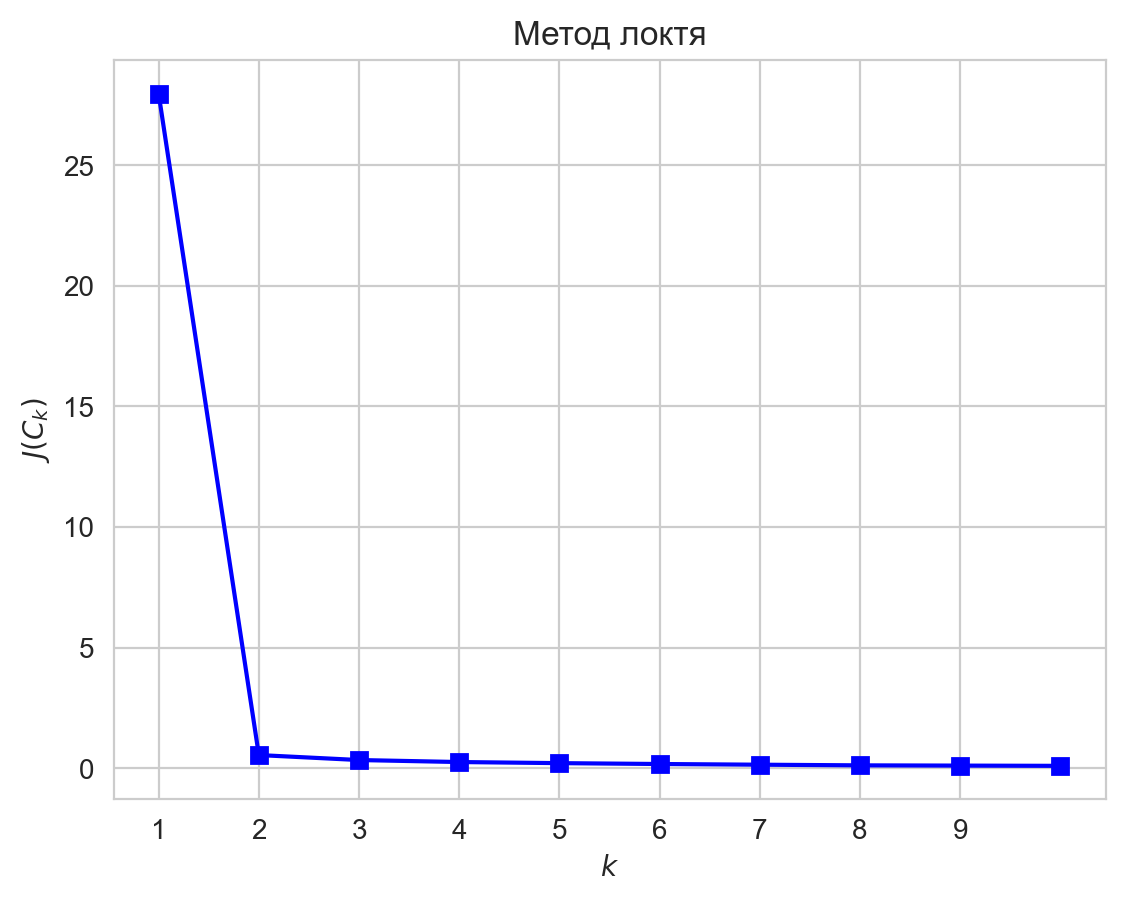

In [173]:
# Метод локтя - ищем оптимальное кол-во кластеров
from sklearn.cluster import KMeans
from sklearn import metrics 
from scipy.spatial.distance import cdist

rg = range(1, 11)
inertia = []
for k in rg:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1).fit(points)
    inertia.append(np.sqrt(kmeans.inertia_))
    
plt.plot(rg, inertia, marker='s', color='blue')
plt.xticks (ticks=range(1,10))
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')
plt.title('Метод локтя');

Так как перегиб происходит в точке k=2, оптимальное количество кластеров равно 2.

Теперь обучим модель кластеризации методом K-means для 2 кластеров.

In [174]:
# Кластеризация методом K-means
from sklearn.cluster import KMeans
kmeanModel = KMeans(n_clusters=2, n_init=10)
kmeanModel.fit(points)

centers = kmeanModel.cluster_centers_ 
labels_kmeans = kmeanModel.labels_

In [175]:
# Посмотрим, к какому кластеру отнесли каждую криптовалюту
labels_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

Получилось, что среди 68 криптовалют только одна попала в другой кластер. То есть данная кластеризация получилось недостаточно информативной. Это может быть связано с тем, что метод K-means предпочтителен при работе с кластерами с простой геометрией, более сложные формы он может интерпретировать некорректно. Поэтому рассмотрим другой алгоритм, который формирует кластеры в рамках заданнной окрестности, то есть метод **DBSCAN**.

<font color='red' size=5>Кластеризация методом DBSCAN</font>

DBSCAN (Density-based spatial clustering of applications with noise) - это алгоритм, основанный на плотности — если дан набор объектов в некотором пространстве, алгоритм группирует вместе объекты, которые расположены близко и помечает как выбросы объекты, которые находятся в областях с малой плотностью (ближайшие соседи которых лежат далеко). Алгоритм имеет два основных гиперпараметра:

- `eps` &mdash; радиус рассматриваемой окрестности
- `min_samples` &mdash; число соседей в окрестности

Метод DBSCAN умеет хорошо искать кластеры сложной формы.

DBSCAN понимает где какая плотность точек. Перед его запуском на наших данных подумаем о том, какие параметры выбрать.

**Параметр `min_samples`**, минимальное число чекинов в кластере, возьмём $4$, чтобы избавиться от маргинальных кластеров по 1-2-3 наблюдения, но при этом сохранить осмысленность, так как всего мы рассматриваем 68 разных криптовалют.

**Параметр `eps`**

Проанализировав диаграммы соотношения доходности/волатильности, доходности/VaR, понятно, что:
- доходность колеблется 0 до 0.007, при этом основное сосредоточение точек в пределах от 0.002 до 0.005
- волатильность колеблется от 0 до 0.14, при этом основное сосредоточение точек в пределах от 0.05 до 0.09
- VaR колеблется от -0.12 до 0, при этом основное сосредоточение точек в пределах от -0.12 до -0.07
- коэффициент Шарпа колеблется от -0.4 до -0.07

Обучим модель кластеризации для `eps` от 0.005 до 0.1, чтобы учесть и более мелкие колебания доходности, и более значительные коэффициента Шарпа и выберем оптимальный.

In [176]:
# Смотрим на получившееся кол-во кластеров (с учетом кластера "выбросов") для каждого рассматриваемого значения eps
from sklearn.cluster import DBSCAN
epsilon = pd.DataFrame()
e = []
l = []

iter = []
for i in range(5, 100, 5):
    iter.append(i/1000)

for item in iter:
    clustering = DBSCAN(eps=item, min_samples=4).fit(points)
    labels_dbscan = clustering.labels_
    a = np.unique(labels_dbscan)
    e.append(item)
    l.append(len(a))

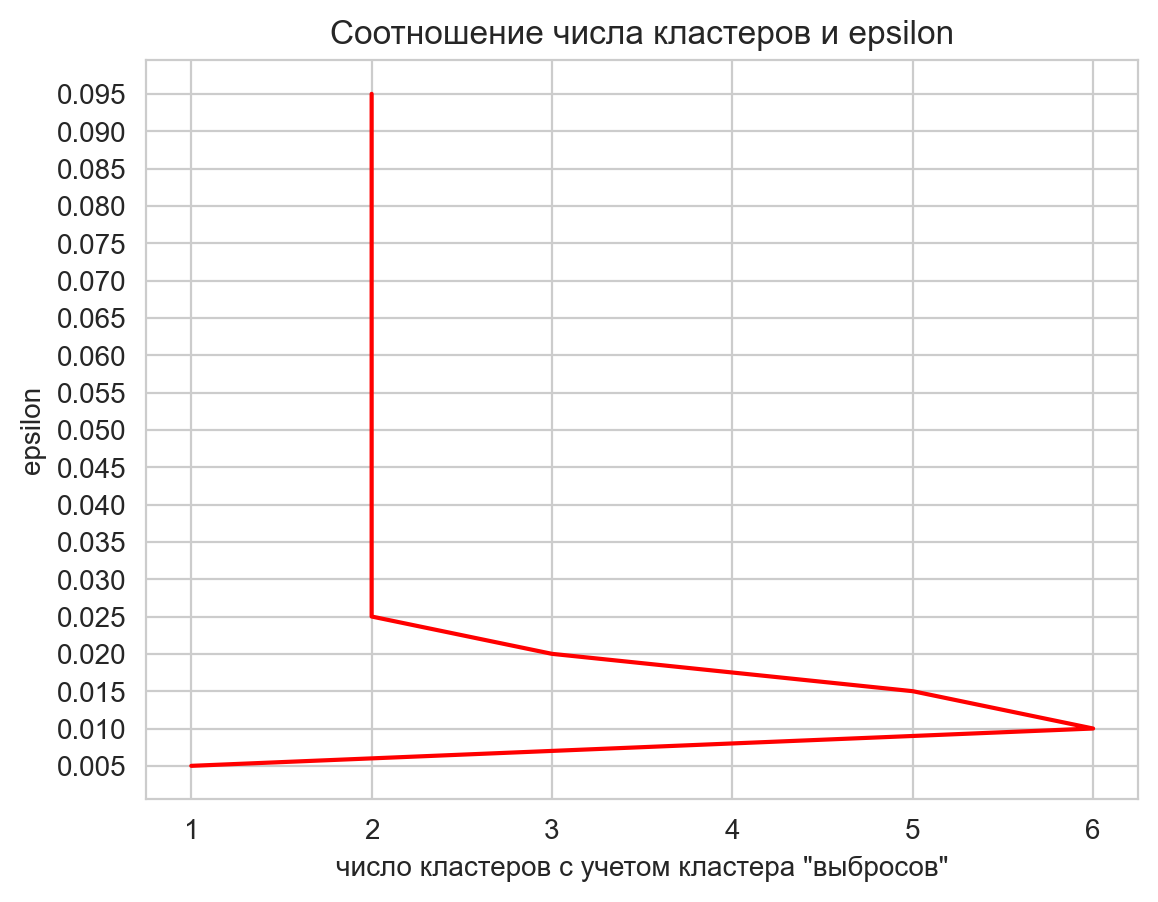

In [177]:
plt.plot(l,e, color='red')
plt.xlabel('число кластеров с учетом кластера "выбросов"')
plt.ylabel('epsilon')
plt.title('Соотношение числа кластеров и epsilon')
plt.yticks (ticks=iter);

Чтобы избежать кластеров с минимальным значением криптовалют в них, будем рассматривать не максимальное значение кластеров, а k = 5. Для этого будем считать eps=0.015

In [178]:
# Кластеризация методом DBSCAN при eps=0.015 и min_samples=4
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.015, min_samples=4).fit(points)

labels_dbscan = clustering.labels_

In [179]:
# Посмотрим, к какому кластеру отнесли каждую криптовалюту
labels_dbscan

array([-1,  0,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,
        1,  2, -1,  1,  1,  1,  2,  1, -1,  1,  1,  2,  1,  1,  1,  2, -1,
        1,  2,  2,  3,  1, -1,  2,  2,  1,  1,  3,  1,  2,  2,  1,  1,  1,
       -1,  3, -1,  1,  2,  1,  2,  2,  2,  1,  2,  3,  2,  3,  0,  1,  2])

Всего у нас получилось 4 кластера (метки 0, 1, 2, 3) и выбросы (метка -1).

In [180]:
# Внесем данные по кластеризации в таблицу с показателями
final = points.copy()
final['claster'] = labels_dbscan
final

yield  volatility       VaR     Sharp  claster
BTCUSDT   0.002353    0.041902 -0.059693 -0.406524       -1
ETHUSDT   0.003267    0.053399 -0.077428 -0.305452        0
BNBUSDT   0.004594    0.061106 -0.071062 -0.243483        1
NEOUSDT   0.000764    0.061393 -0.094625 -0.305546        0
LTCUSDT   0.001618    0.056531 -0.083608 -0.316122        0
...            ...         ...       ...       ...      ...
RLCUSDT   0.004463    0.083725 -0.112285 -0.181659        2
CTXCUSDT  0.006397    0.109865 -0.113112 -0.118621        3
BCHUSDT   0.001142    0.060998 -0.083120 -0.302268        0
TROYUSDT  0.002596    0.081630 -0.100031 -0.205911        1
VITEUSDT  0.003028    0.089436 -0.112857 -0.182640        2

[68 rows x 5 columns]

In [181]:
# Кол-во кластеров
final['claster'].unique()

array([-1,  0,  1,  2,  3])

Всего у нас получилось 4 кластера (метки 0, 1, 2, 3) и выбросы (метка -1). Посмотрим на них подробнее:

In [182]:
# Распечатали файл с типом каждой криптовалюты
with open('type.txt', 'r') as f:
    text = f.read()
data_type = text.split('\n')
len(data_type)

68

In [183]:
# Внесем категориальные данные в таблицу с показателями
final['type'] = data_type
final

yield  volatility       VaR     Sharp  claster   type
BTCUSDT   0.002353    0.041902 -0.059693 -0.406524       -1   coin
ETHUSDT   0.003267    0.053399 -0.077428 -0.305452        0   coin
BNBUSDT   0.004594    0.061106 -0.071062 -0.243483        1   coin
NEOUSDT   0.000764    0.061393 -0.094625 -0.305546        0   coin
LTCUSDT   0.001618    0.056531 -0.083608 -0.316122        0   coin
...            ...         ...       ...       ...      ...    ...
RLCUSDT   0.004463    0.083725 -0.112285 -0.181659        2  token
CTXCUSDT  0.006397    0.109865 -0.113112 -0.118621        3   coin
BCHUSDT   0.001142    0.060998 -0.083120 -0.302268        0   coin
TROYUSDT  0.002596    0.081630 -0.100031 -0.205911        1  token
VITEUSDT  0.003028    0.089436 -0.112857 -0.182640        2   coin

[68 rows x 6 columns]

In [184]:
# Выбросы
final_minus1 = final[(final['claster']==-1)]
final_minus1

yield  volatility       VaR      Sharp  claster   type
BTCUSDT    0.002353    0.041902 -0.059693  -0.406524       -1   coin
ONGUSDT    0.005922    0.158006 -0.101649  -0.112363       -1  token
XMRUSDT    0.001322    0.054571 -0.077065  -0.335237       -1   coin
MATICUSDT  0.009314    0.086324 -0.094914  -0.130744       -1   coin
DOGEUSDT   0.007906    0.156643 -0.087562  -0.072952       -1   coin
CHZUSDT    0.008894    0.088191 -0.096548  -0.117326       -1  token
BUSDUSDT  -0.000007    0.000689 -0.000900 -28.371741       -1  token

In [185]:
# Кластер 1
final_0 = final[(final['claster']==0)]
final_0

yield  volatility       VaR     Sharp  claster  type
ETHUSDT  0.003267    0.053399 -0.077428 -0.305452        0  coin
NEOUSDT  0.000764    0.061393 -0.094625 -0.305546        0  coin
LTCUSDT  0.001618    0.056531 -0.083608 -0.316122        0  coin
TRXUSDT  0.002957    0.055935 -0.078907 -0.292642        0  coin
BCHUSDT  0.001142    0.060998 -0.083120 -0.302268        0  coin

In [186]:
# Кластер 2
final_1 = final[(final['claster']==1)]
final_1

yield  volatility       VaR     Sharp  claster   type
BNBUSDT    0.004594    0.061106 -0.071062 -0.243483        1   coin
QTUMUSDT   0.003130    0.070573 -0.098175 -0.233860        1   coin
ADAUSDT    0.003038    0.061742 -0.085595 -0.265649        1   coin
XRPUSDT    0.003225    0.064364 -0.081045 -0.251325        1   coin
EOSUSDT    0.001476    0.064908 -0.094057 -0.278058        1   coin
IOTAUSDT   0.001965    0.064460 -0.090795 -0.264930        1   coin
XLMUSDT    0.002704    0.065555 -0.082225 -0.253294        1   coin
ONTUSDT    0.001028    0.065388 -0.093976 -0.283224        1   coin
ETCUSDT    0.003648    0.068984 -0.087713 -0.235866        1   coin
ICXUSDT    0.003795    0.073011 -0.104170 -0.209796        1   coin
NULSUSDT   0.002369    0.079641 -0.098311 -0.217270        1   coin
VETUSDT    0.003489    0.070317 -0.100790 -0.224410        1   coin
LINKUSDT   0.002562    0.066729 -0.097160 -0.254848        1   coin
HOTUSDT    0.001864    0.069249 -0.091149 -0.250442        1  token
ZILUSDT    0.003562    0.076389 -0.099976 -0.208291        1   coin
ZRXUSDT    0.003428    0.073302 -0.095729 -0.216668        1  token
BATUSDT    0.003385    0.065533 -0.092318 -0.243866        1  token
ZECUSDT    0.000839    0.064080 -0.099693 -0.294406        1   coin
IOSTUSDT   0.003413    0.072101 -0.095601 -0.218665        1   coin
DASHUSDT   0.001393    0.063769 -0.090391 -0.283467        1   coin
OMGUSDT    0.002501    0.077269 -0.103355 -0.222260        1  token
THETAUSDT  0.005346    0.071586 -0.098603 -0.193326        1   coin
ATOMUSDT   0.003880    0.070641 -0.104587 -0.221171        1   coin
ALGOUSDT   0.002021    0.070017 -0.098619 -0.250503        1   coin
WINUSDT    0.000028    0.071452 -0.096041 -0.269572        1  token
COSUSDT    0.001466    0.077840 -0.103174 -0.227176        1  token
TOMOUSDT   0.003732    0.072694 -0.102632 -0.217246        1   coin
DOCKUSDT   0.002351    0.076978 -0.107949 -0.219715        1   coin
WANUSDT    0.003845    0.071861 -0.093722 -0.215370        1   coin
FUNUSDT    0.002594    0.062519 -0.078357 -0.266864        1  token
XTZUSDT    0.002122    0.067406 -0.102880 -0.256454        1   coin
RVNUSDT    0.003481    0.076243 -0.097472 -0.205800        1   coin
KAVAUSDT   0.002859    0.075089 -0.109521 -0.220013        1  token
TROYUSDT   0.002596    0.081630 -0.100031 -0.205911        1  token

In [187]:
final_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, BNBUSDT to TROYUSDT
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yield       34 non-null     float64
 1   volatility  34 non-null     float64
 2   VaR         34 non-null     float64
 3   Sharp       34 non-null     float64
 4   claster     34 non-null     int64  
 5   type        34 non-null     object 
dtypes: float64(4), int64(1), object(1)
memory usage: 1.9+ KB


In [188]:
# Кластер 3
final_2 = final[(final['claster']==2)]
final_2

yield  volatility       VaR     Sharp  claster   type
WAVESUSDT  0.005056    0.078307 -0.107303 -0.181706        2   coin
FETUSDT    0.006368    0.084334 -0.115395 -0.155639        2   coin
CELRUSDT   0.003878    0.085750 -0.118026 -0.192542        2  token
ENJUSDT    0.005512    0.078874 -0.102151 -0.176689        2  token
TFUELUSDT  0.005745    0.082112 -0.094985 -0.166226        2   coin
ONEUSDT    0.003750    0.082629 -0.104288 -0.191247        2   coin
DUSKUSDT   0.006122    0.083517 -0.113137 -0.157555        2  token
ANKRUSDT   0.005606    0.083488 -0.099257 -0.166160        2  token
PERLUSDT   0.004535    0.089514 -0.120064 -0.163597        2  token
DENTUSDT   0.003319    0.093264 -0.111579 -0.168627        2  token
RENUSDT    0.005059    0.083886 -0.113521 -0.171938        2  token
HBARUSDT   0.005387    0.084277 -0.095799 -0.164091        2   coin
NKNUSDT    0.004705    0.094029 -0.108277 -0.152733        2   coin
STXUSDT    0.005532    0.085263 -0.102999 -0.162135        2   coin
ARPAUSDT   0.005891    0.086030 -0.109516 -0.153376        2  token
RLCUSDT    0.004463    0.083725 -0.112285 -0.181659        2  token
VITEUSDT   0.003028    0.089436 -0.112857 -0.182640        2   coin

In [189]:
final_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, WAVESUSDT to VITEUSDT
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yield       17 non-null     float64
 1   volatility  17 non-null     float64
 2   VaR         17 non-null     float64
 3   Sharp       17 non-null     float64
 4   claster     17 non-null     int64  
 5   type        17 non-null     object 
dtypes: float64(4), int64(1), object(1)
memory usage: 952.0+ bytes


In [190]:
# Кластер 4
final_3 = final[(final['claster']==3)]
final_3

yield  volatility       VaR     Sharp  claster   type
FTMUSDT   0.008380    0.096788 -0.121883 -0.113784        3   coin
MTLUSDT   0.005324    0.109967 -0.104559 -0.124841        3  token
BANDUSDT  0.006394    0.097044 -0.106158 -0.132253        3  token
IOTXUSDT  0.007073    0.100202 -0.109576 -0.119671        3   coin
CTXCUSDT  0.006397    0.109865 -0.113112 -0.118621        3   coin

Построим графики с соотношениями рыночных показателей криптовалют и отобразим на них рыночные показатели.

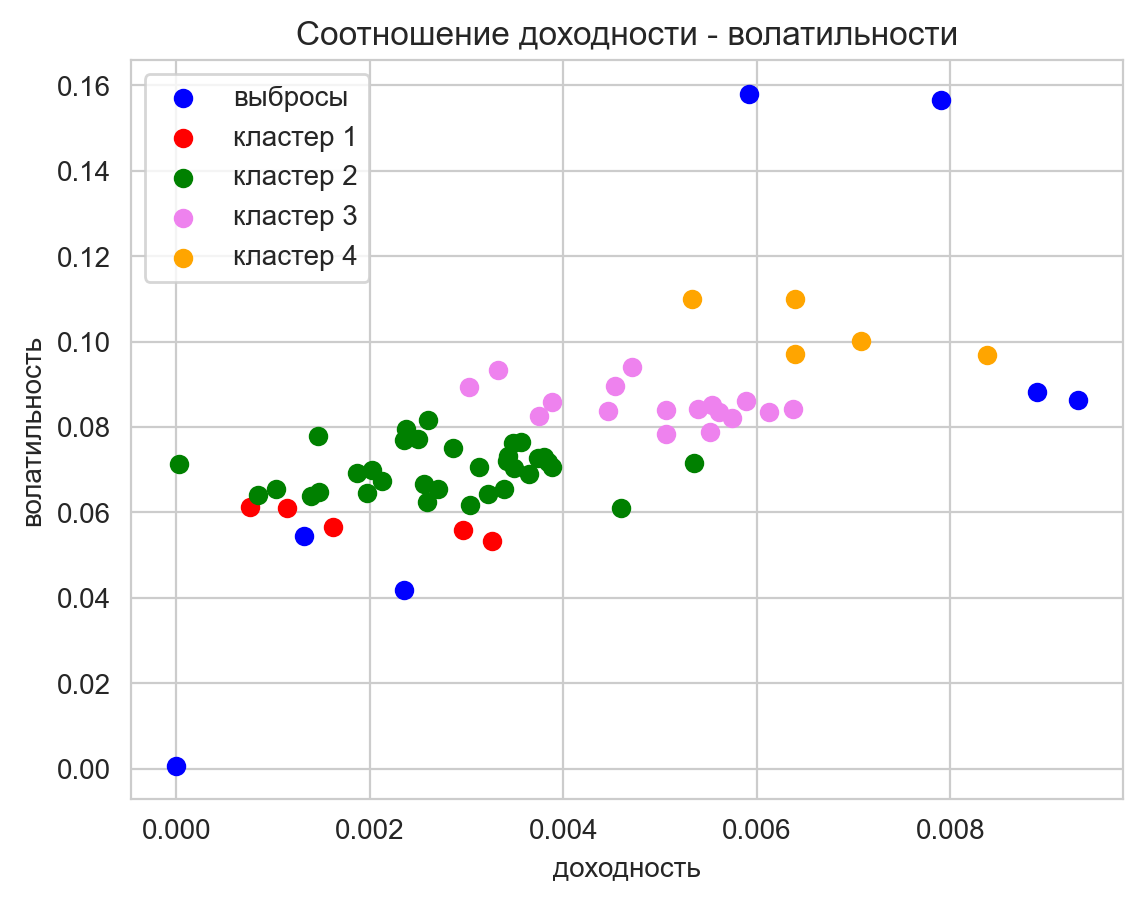

In [191]:
# График доходность-волатильность
plt.scatter(final_minus1['yield'],final_minus1['volatility'], c='blue', label='выбросы')
plt.scatter(final_0['yield'],final_0['volatility'], c='red', label='кластер 1')
plt.scatter(final_1['yield'],final_1['volatility'], c='green', label='кластер 2')
plt.scatter(final_2['yield'],final_2['volatility'], c='violet', label='кластер 3');
plt.scatter(final_3['yield'],final_3['volatility'], c='orange', label='кластер 4');
plt.legend()
plt.title('Соотношение доходности - волатильности')
plt.xlabel('доходность')
plt.ylabel('волатильность');

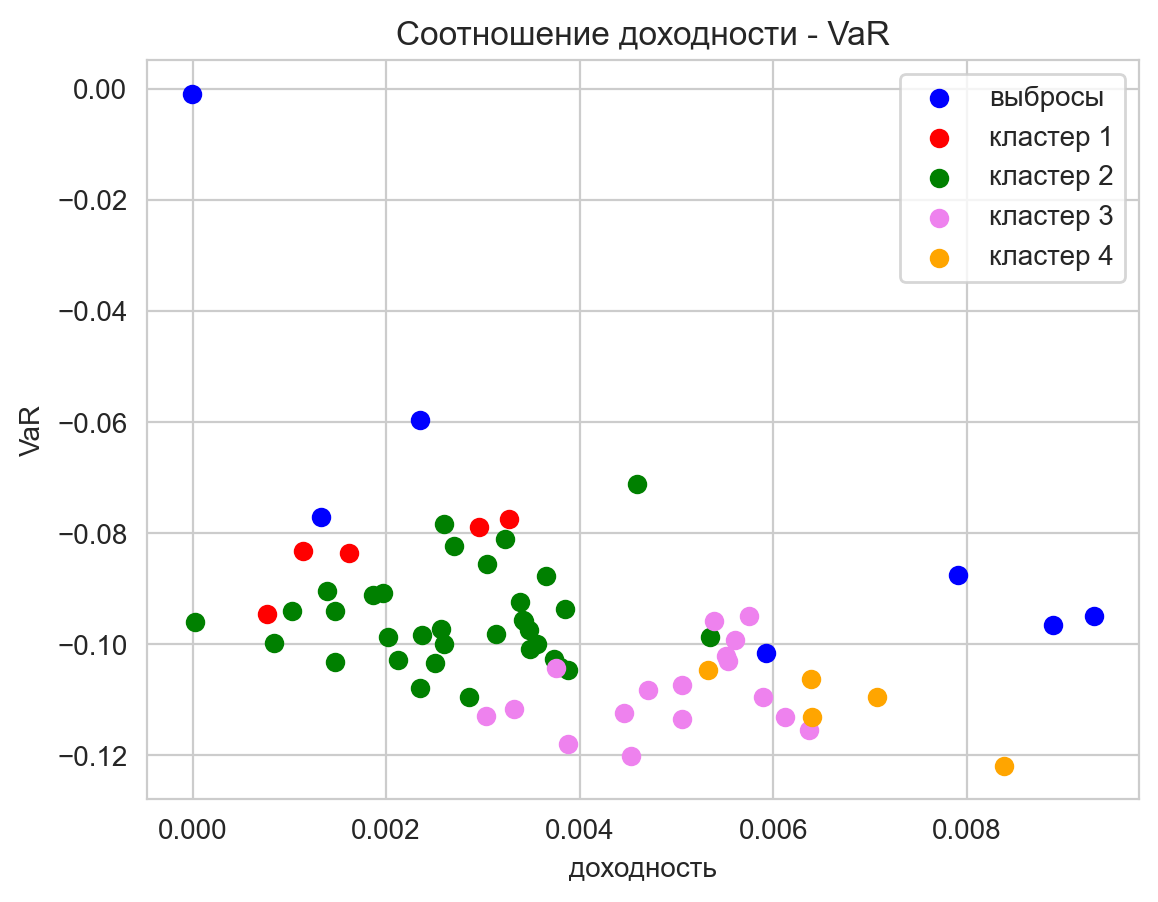

In [192]:
# График доходность-VaR
plt.scatter(final_minus1['yield'],final_minus1['VaR'], c='blue', label='выбросы')
plt.scatter(final_0['yield'],final_0['VaR'], c='red', label='кластер 1')
plt.scatter(final_1['yield'],final_1['VaR'], c='green', label='кластер 2')
plt.scatter(final_2['yield'],final_2['VaR'], c='violet', label='кластер 3');
plt.scatter(final_3['yield'],final_3['VaR'], c='orange', label='кластер 4');
plt.legend()
plt.title('Соотношение доходности - VaR')
plt.xlabel('доходность')
plt.ylabel('VaR');

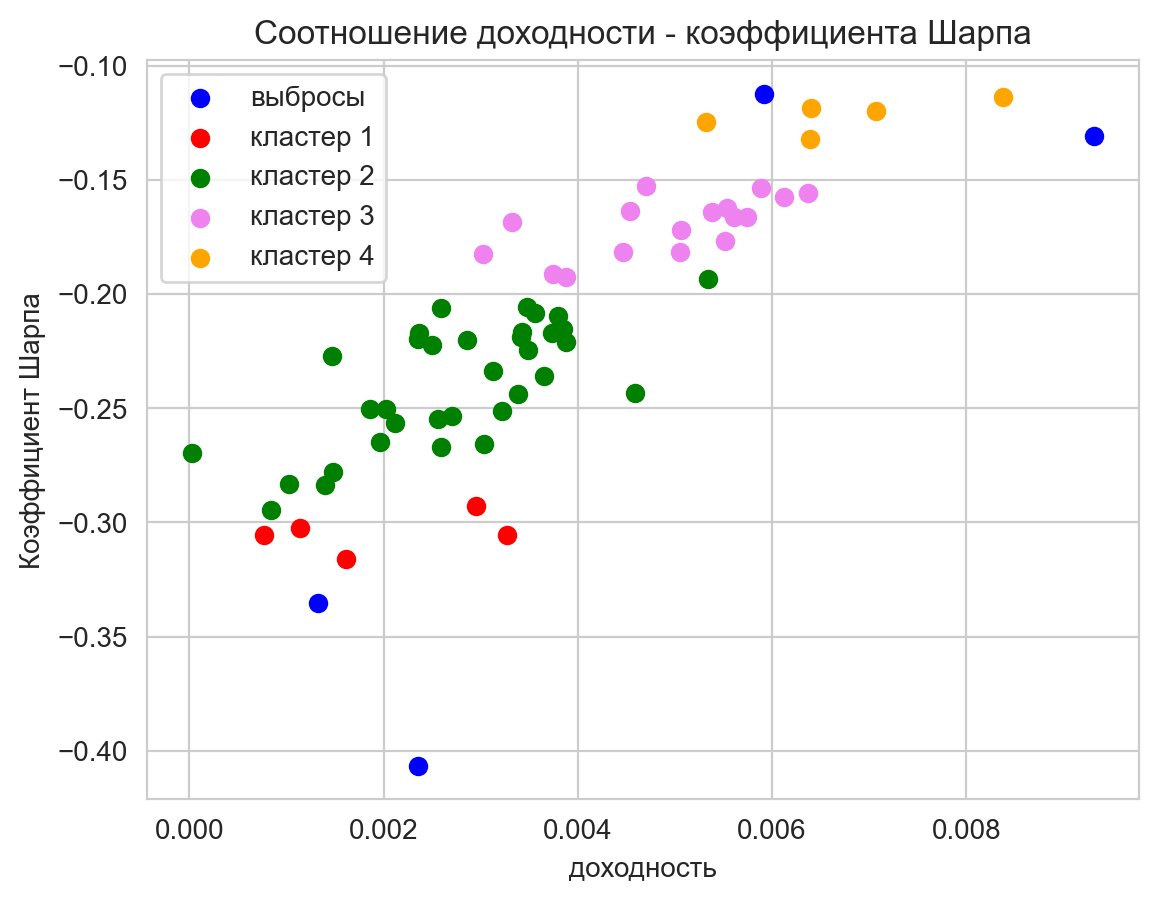

In [193]:
# График доходность-коэффициент Шарпа
# Не построили BUSDUSDT из выбросов, так как его коэффициент Шарпа сильно больше и мешает корректному отображению
plt.scatter(final_minus1['yield'][0:4],final_minus1['Sharp'][0:4], c='blue', label='выбросы')
plt.scatter(final_0['yield'],final_0['Sharp'], c='red', label='кластер 1')
plt.scatter(final_1['yield'],final_1['Sharp'], c='green', label='кластер 2')
plt.scatter(final_2['yield'],final_2['Sharp'], c='violet', label='кластер 3');
plt.scatter(final_3['yield'],final_3['Sharp'], c='orange', label='кластер 4');
plt.legend()
plt.title('Соотношение доходности - коэффициента Шарпа')
plt.xlabel('доходность')
plt.ylabel('Коэффициент Шарпа');

Кластеры получились такими:
- метка "0" - 5 криптовалют
- метка "1" - 34 криптовалюты
- метка "2" - 17 криптовалют
- метка "3" - 5 криптовалют
- выбросы (метка "-1") - 7 криптовалют

На графиках довольно легко можно заметить получившиеся кластеры. У каждого из них есть свои особенности:

<font color='darkviolet'>**Криптовалюты первого кластера**:</font> 
- только монеты
- используются как платежные средства или для проведения транзакций
- доходность [0.0007; 0.003]
- волатильность [0.053; 0.061]
- VaR [-0.094; -0.077]
- коэффициент Шарпа [0.29; 0.32]

<font color='mediumturquoise'>**Криптовалюты второго кластера**:</font> 
- монеты и токены
- используются в основном как платежное средство, технический токен для биржи или трейдинга
- доходность [0.00002; 0.005]
- волатильность [0.06; 0.089]
- VaR [-0.109; -0.07]
- коэффициент Шарпа [-0.29; -0.19]

<font color='deeppink'>**Криптовалюты третьего кластера**:</font> 
- монеты и токены
- используются в основном для обеспечения операций на блокчейне, как смарт-конракты некоторых реальных активов
- доходность [0.003; 0.006]
- волатильность [0.07; 0.094]
- VaR [-0.12; -0.094]
- коэффициент Шарпа [-0.193; -0.153]

<font color='dodgerblue'>**Криптовалюты четвертого кластера**:</font> 
- монеты и токены
- обеспечивают функционирование платформ для смарт-контрактов и искуственного интеллекта или используются как utlity token
- доходность [0.005; 0.0083]
- волатильность [0.096; 0.11]
- VaR [-0.1046; -0.1219]
- коэффициент Шарпа [-0.1138; -0.1323]